<a href="https://colab.research.google.com/github/hafidikhsan/Lexical-training/blob/main/IELTS_Lexical_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training IELTS Lexical Model
---

## Pre-processing 🆗

### Install and import library ✅

In [2]:
# Install library
%%capture
!pip install datasets

In [3]:
# Import library
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset, load_from_disk
from sklearn.model_selection import train_test_split

In [4]:
# Make pandas dataframe big
pd.set_option("display.max_colwidth", None)

### Access drive from colab ✅

In [5]:
# Drive access
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


### Collect dataset ✅

#### CEFR-SP

In [19]:
# Copy dataset
!cp -r "/content/drive/MyDrive/Capstone Project/Lexical/Dataset/CEFR-SP/CEFR-SP.zip" "/content/"

In [21]:
# Unzip dataset
!unzip "CEFR-SP.zip"

Archive:  CEFR-SP.zip
   creating: SCoRE/
 extracting: SCoRE/CEFR-SP_SCoRE_test.txt  
   creating: Wiki-Auto/
 extracting: Wiki-Auto/CEFR-SP_Wikiauto_test.txt  
 extracting: README.md               
 extracting: SCoRE/CEFR-SP_SCoRE_dev.txt  
 extracting: SCoRE/CEFR-SP_SCoRE_train.txt  
 extracting: Wiki-Auto/CEFR-SP_Wikiauto_dev.txt  
 extracting: Wiki-Auto/CEFR-SP_Wikiauto_train.txt  


In [9]:
# Path init CEFR-SP dataset SCoRE
SCoRE_val = "SCoRE/CEFR-SP_SCoRE_dev.txt"
SCoRE_test = "SCoRE/CEFR-SP_SCoRE_test.txt"
SCoRE_train = "SCoRE/CEFR-SP_SCoRE_train.txt"

In [10]:
# Path init CEFR-SP dataset WikiAuto
WikiAuto_val = "Wiki-Auto/CEFR-SP_Wikiauto_dev.txt"
WikiAuto_test = "Wiki-Auto/CEFR-SP_Wikiauto_test.txt"
WikiAuto_train = "Wiki-Auto/CEFR-SP_Wikiauto_train.txt"

#### Kaggle

In [11]:
# Init csv name
kaggle_csv_name = "cefr_leveled_texts.csv"

##### API

In [26]:
# Copy Kaggle json
!cp -r "/content/drive/MyDrive/Capstone Project/Lexical/Dataset/Kaggle/kaggle.json" "/content/"

In [27]:
# Save Kaggle API key to colab
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [28]:
# Download dataset
!kaggle datasets download amontgomerie/cefr-levelled-english-texts

  0% 0.00/1.36M [00:00<?, ?B/s]
100% 1.36M/1.36M [00:00<00:00, 92.5MB/s]


In [29]:
# Unzip dataset
!unzip "cefr-levelled-english-texts.zip"

Archive:  cefr-levelled-english-texts.zip
  inflating: cefr_leveled_texts.csv  


In [12]:
# Define path
kaggle_path = kaggle_csv_name

##### Local

In [ ]:
# Define path
kaggle_path = "/content/drive/MyDrive/Capstone Project/Lexical/Dataset/Kaggle/cefr_leveled_texts.csv"

#### CERD

In [31]:
# Copy dataset
!cp -r "/content/drive/MyDrive/Capstone Project/Lexical/Dataset/CERD/Readability_dataset_clean.zip" "/content/"

In [33]:
# Unzip data
!unzip "Readability_dataset_clean.zip"

Archive:  Readability_dataset_clean.zip
   creating: Readability_dataset_clean/
  inflating: __MACOSX/._Readability_dataset_clean  
  inflating: Readability_dataset_clean/.DS_Store  
  inflating: __MACOSX/Readability_dataset_clean/._.DS_Store  
   creating: Readability_dataset_clean/CAE/
  inflating: __MACOSX/Readability_dataset_clean/._CAE  
   creating: Readability_dataset_clean/PET/
  inflating: __MACOSX/Readability_dataset_clean/._PET  
   creating: Readability_dataset_clean/CPE/
  inflating: __MACOSX/Readability_dataset_clean/._CPE  
   creating: Readability_dataset_clean/FCE/
  inflating: __MACOSX/Readability_dataset_clean/._FCE  
   creating: Readability_dataset_clean/KET/
  inflating: __MACOSX/Readability_dataset_clean/._KET  
  inflating: Readability_dataset_clean/CAE/29.txt  
  inflating: __MACOSX/Readability_dataset_clean/CAE/._29.txt  
  inflating: Readability_dataset_clean/CAE/15.txt  
  inflating: __MACOSX/Readability_dataset_clean/CAE/._15.txt  
  inflating: Readability_

In [13]:
# Define path
cerd_path = "Readability_dataset_clean"

#### Hugging Face

In [14]:
# Define path
hugging_face_path = "hugging_face_dataset"

##### API

In [15]:
# Import dataset from Hugging Face
hugging_face_dataset = load_dataset("sebastiaan/test-cefr")

  0%|          | 0/3 [00:00<?, ?it/s]

In [16]:
# Define dataset
hugging_face_train = hugging_face_dataset["train"]
hugging_face_test = hugging_face_dataset["test"]
hugging_face_val = hugging_face_dataset["validation"]

##### Local

In [ ]:
# Copy dataset
!cp -r "/content/drive/MyDrive/Capstone Project/Lexical/Dataset/Hugging Face/hugging_face_dataset" "/content/"

In [ ]:
# Unzip data
!unzip "hugging_face_dataset.zip"

In [ ]:
# Load dataset
local_hugging_face = load_from_disk(hugging_face_path)

In [ ]:
# Define dataset
hugging_face_train = local_hugging_face["train"]
hugging_face_test = local_hugging_face["test"]
hugging_face_val = local_hugging_face["validation"]

### Save dataset (Optional) ⁉️

In [37]:
# Make dataset dir
!mkdir Dataset

In [38]:
# Go to dataset folder
%cd Dataset

/content/Dataset


#### CEFR-SP

In [39]:
# Make CEFR-SP dir
!mkdir CEFR-SP

In [42]:
# Copy zip file
!cp -r "../CEFR-SP.zip" /content/Dataset/CEFR-SP

#### Kaggle

In [43]:
# Make Kaggle dir
!mkdir Kaggle

In [44]:
# Copy csv file
!cp -r "../cefr_leveled_texts.csv" /content/Dataset/Kaggle

#### CERD

In [45]:
# Make CERD dir
!mkdir CERD

In [46]:
# Copy zip file
!cp -r "../Readability_dataset_clean.zip" /content/Dataset/CERD

#### Hugging Face

In [47]:
# Make Hugging Face dir
!mkdir "Hugging Face"

In [48]:
# Go to Hugging Face folder
%cd "Hugging Face"

/content/Dataset/Hugging Face


In [49]:
# Save dataset to disk
hugging_face_dataset.save_to_disk("hugging_face_dataset")

Saving the dataset (0/1 shards):   0%|          | 0/240440 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/29335 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/30225 [00:00<?, ? examples/s]

In [50]:
# Zip file
!zip -r "hugging_face_dataset.zip" "hugging_face_dataset"

  adding: hugging_face_dataset/ (stored 0%)
  adding: hugging_face_dataset/dataset_dict.json (deflated 2%)
  adding: hugging_face_dataset/validation/ (stored 0%)
  adding: hugging_face_dataset/validation/dataset_info.json (deflated 65%)
  adding: hugging_face_dataset/validation/data-00000-of-00001.arrow (deflated 68%)
  adding: hugging_face_dataset/validation/state.json (deflated 38%)
  adding: hugging_face_dataset/test/ (stored 0%)
  adding: hugging_face_dataset/test/dataset_info.json (deflated 65%)
  adding: hugging_face_dataset/test/data-00000-of-00001.arrow (deflated 68%)
  adding: hugging_face_dataset/test/state.json (deflated 37%)
  adding: hugging_face_dataset/train/ (stored 0%)
  adding: hugging_face_dataset/train/dataset_info.json (deflated 65%)
  adding: hugging_face_dataset/train/data-00000-of-00001.arrow (deflated 68%)
  adding: hugging_face_dataset/train/state.json (deflated 38%)


In [51]:
# Go back folder
%cd ..

/content/Dataset


#### Zip all folder

In [52]:
# Go back folder
%cd ..

/content


In [53]:
# Zip file
!zip -r "Dataset.zip" /content/Dataset

  adding: content/Dataset/ (stored 0%)
  adding: content/Dataset/CEFR-SP/ (stored 0%)
  adding: content/Dataset/CEFR-SP/CEFR-SP.zip (stored 0%)
  adding: content/Dataset/CERD/ (stored 0%)
  adding: content/Dataset/CERD/Readability_dataset_clean.zip (stored 0%)
  adding: content/Dataset/Hugging Face/ (stored 0%)
  adding: content/Dataset/Hugging Face/hugging_face_dataset/ (stored 0%)
  adding: content/Dataset/Hugging Face/hugging_face_dataset/dataset_dict.json (deflated 2%)
  adding: content/Dataset/Hugging Face/hugging_face_dataset/validation/ (stored 0%)
  adding: content/Dataset/Hugging Face/hugging_face_dataset/validation/dataset_info.json (deflated 65%)
  adding: content/Dataset/Hugging Face/hugging_face_dataset/validation/data-00000-of-00001.arrow (deflated 68%)
  adding: content/Dataset/Hugging Face/hugging_face_dataset/validation/state.json (deflated 38%)
  adding: content/Dataset/Hugging Face/hugging_face_dataset/test/ (stored 0%)
  adding: content/Dataset/Hugging Face/hugging_

### Dataset Initialization ✅

In [17]:
# Initialize columns
columns = ["Text", "Level"]

#### CEFR-SP

##### Define function to use

In [18]:
# Define function to read dataset
def read_cefr_corpus(corpus_path):
    levels, sents = [], []
    lv_indices = {0: [], 1: [], 2: [], 3: [], 4: [], 5: []}

    for path in corpus_path:
        with open(path) as f:
            all_texts = f.readlines()

        for line in all_texts:
            array = line.strip().split("\t")
            annotator_x = int(array[1])
            annotator_y = int(array[2])

            if abs(annotator_x - annotator_y) <= 1:
                lv = max(annotator_x, annotator_y) - 1

                levels.append(lv)
                sents.append(array[0])
                lv_indices[lv].append(len(sents) - 1)

    return np.array(levels), sents, lv_indices

In [19]:
# Define function to parsing dataset to numpy
def parsing_to_numpy(levels, sents):
    all = []

    for i in range(len(sents)):
        text = sents[i]
        level = levels[i]

        temp = []
        temp.append(text)
        temp.append(level)

        np.array(temp)
        all.append(temp)

    return np.array(all)

##### Read dataset

###### SCoRE (Optional)

In [20]:
# Read CEFR-SP dataset SCoRE
All_levels_val, All_sents_val, All_lv_indices_val = read_cefr_corpus([SCoRE_val])
All_levels_test, All_sents_test, All_lv_indices_test = read_cefr_corpus([SCoRE_test])
All_levels_train, All_sents_train, All_lv_indices_train = read_cefr_corpus([SCoRE_train])

###### Wiki-Auto (Optional)

In [21]:
# Read CEFR-SP dataset Wiki-Auto
All_levels_val, All_sents_val, All_lv_indices_val = read_cefr_corpus([WikiAuto_val])
All_levels_test, All_sents_test, All_lv_indices_test = read_cefr_corpus([WikiAuto_test])
All_levels_train, All_sents_train, All_lv_indices_train = read_cefr_corpus([WikiAuto_train])

###### All

In [22]:
# Read all CEFR-SP dataset
All_levels_val, All_sents_val, All_lv_indices_val = read_cefr_corpus([SCoRE_val, WikiAuto_val])
All_levels_test, All_sents_test, All_lv_indices_test = read_cefr_corpus([SCoRE_test, WikiAuto_test])
All_levels_train, All_sents_train, All_lv_indices_train = read_cefr_corpus([SCoRE_train, WikiAuto_train])

##### Parsing to numpy

In [23]:
# Parsing CEFR-SP dataset to numpy
cefr_sp_train = parsing_to_numpy(All_levels_train, All_sents_train)
cefr_sp_val = parsing_to_numpy(All_levels_val, All_sents_val)
cefr_sp_test = parsing_to_numpy(All_levels_test, All_sents_test)

##### Convert from numpy to dataframe

In [24]:
# Convert numpy to dataframe
df_cefr_sp_train = pd.DataFrame(cefr_sp_train, columns=columns)
df_cefr_sp_val = pd.DataFrame(cefr_sp_val, columns=columns)
df_cefr_sp_test = pd.DataFrame(cefr_sp_test, columns=columns)

In [25]:
# Replace value in level column
df_cefr_sp_train["Level"] = df_cefr_sp_train["Level"].replace(["0", "1", "2", "3", "4", "5"], ["A1", "A2", "B1", "B2", "C1", "C2"])
df_cefr_sp_val["Level"] = df_cefr_sp_val["Level"].replace(["0", "1", "2", "3", "4", "5"], ["A1", "A2", "B1", "B2", "C1", "C2"])
df_cefr_sp_test["Level"] = df_cefr_sp_test["Level"].replace(["0", "1", "2", "3", "4", "5"], ["A1", "A2", "B1", "B2", "C1", "C2"])

In [26]:
# Merging All CEFR-SP dataset 
df_cefr_sp_all = pd.concat([df_cefr_sp_train, df_cefr_sp_val, df_cefr_sp_test])

##### Display dataset

In [27]:
# Display CEFR-SP train dataset
df_cefr_sp_train.head()

,Text,Level
0,Is that your bike ?,A1
1,She had a beautiful necklace around her neck .,A1
2,I forgot to bring my umbrella .,A1
3,The baby kept crying .,A1
4,Do you know what you 're doing this weekend ?,A1


In [28]:
# Display CEFR-SP train dataset information
df_cefr_sp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7178 entries, 0 to 7177
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    7178 non-null   object
 1   Level   7178 non-null   object
dtypes: object(2)
memory usage: 112.3+ KB


In [29]:
# Display CEFR-SP validation dataset
df_cefr_sp_val.head()

,Text,Level
0,Do you need something to eat ?,A1
1,I have two fish in a bowl .,A1
2,She wanted the grey coat .,A1
3,I sent my girlfriend red roses .,A1
4,She needs to use your phone .,A1


In [30]:
# Display CEFR-SP validation dataset information
df_cefr_sp_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1366 entries, 0 to 1365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1366 non-null   object
 1   Level   1366 non-null   object
dtypes: object(2)
memory usage: 21.5+ KB


In [31]:
# Display CEFR-SP test dataset
df_cefr_sp_test.head()

,Text,Level
0,I bought both of them .,A1
1,Can you speak Thai ?,A1
2,That dog running in circles is mine .,A1
3,Please give me the time .,A1
4,These seats are ours .,A1


In [32]:
# Display CEFR-SP test dataset information
df_cefr_sp_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1460 non-null   object
 1   Level   1460 non-null   object
dtypes: object(2)
memory usage: 22.9+ KB


In [33]:
# Display CEFR-SP all dataset
df_cefr_sp_all.head()

,Text,Level
0,Is that your bike ?,A1
1,She had a beautiful necklace around her neck .,A1
2,I forgot to bring my umbrella .,A1
3,The baby kept crying .,A1
4,Do you know what you 're doing this weekend ?,A1


In [34]:
# Display CEFR-SP all information
df_cefr_sp_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10004 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    10004 non-null  object
 1   Level   10004 non-null  object
dtypes: object(2)
memory usage: 234.5+ KB


#### Kaggle

In [35]:
# Initialize dataset from csv
df_kaggle = pd.read_csv(kaggle_path)

In [36]:
# Rename column name
df_kaggle.rename(columns = {"label":columns[1], "text":columns[0]}, inplace = True)

In [37]:
# Display Kaggle dataset
df_kaggle.head()

,Text,Level
0,"Hi!\nI've been meaning to write for ages and finally today I'm actually doing something about it. Not that I'm trying to make excuses for myself, it's been really hard to sit down and write, as I've been moving around so much. Since we last saw each other I've unpacked my bags in four different cities. This job has turned out to be more of a whirlwind than I expected, but it's all good! \nI went from London to Prague to set up a new regional office there. You know I'd always wanted to go, but maybe I was imagining Prague in spring when I used to talk about that. Winter was really hard, with minus 15 degrees in the mornings and dark really early in the evening. But at least it was blue skies and white snow and not days on end of grey skies and rain, like at home. It's tough being away from home over Christmas, though, and Skype on Christmas Day wasn't really the same as being with everyone.\nFrom there I was on another three-month mission to oversee the set-up of the office in New York. Loved, loved, loved New York! It's like being in one big TV show, as everywhere looks just a little bit familiar. I did every tourist thing you can think of when I wasn't working, and must have spent most of my salary on eating out. It was really hard to leave for the next job, especially as I kind of met someone (!) More about Michael later ...\nSo then I was posted to LA, which felt like a whole other country compared with the East Coast. I could definitely get used to that kind of outdoor, beach lifestyle, but I didn't spend as much time getting to know California as I could have because I was flying back to see Michael every other weekend. He came to see me when he could, but his job means he's often working at weekends, so he couldn't make the flight very often. Those three months flew by and then I was off again, to Frankfurt, which is where I am now. And … so is Michael! He got a month off work and we're trying to work out how we can be in the same place at the same time for a while. We figure the first step in that direction is getting married, which is also why I wanted to write – I can't get married without my oldest friend there! The wedding's going to be at home in London in September and I hope you can come!\nAnyway, tell me all your news and I promise not to leave it so long this time!\nLots of love,\nKath",B2
1,"﻿It was not so much how hard people found the challenge but how far they would go to avoid it that left researchers gobsmacked. The task? To sit in a chair and do nothing but think. \nSo unbearable did some find it that they took up the safe but alarming opportunity to give themselves mild electric shocks in an attempt to break the tedium. \nTwo-thirds of men pressed a button to deliver a painful jolt during a 15-minute spell of solitude. \nUnder the same conditions, a quarter of women pressed the shock button. The difference, scientists suspect, is that men tend to be more sensation-seeking than women. \nThe report from psychologists at Virginia and Harvard Universities is one of a surprising few to tackle the question of why most of us find it so hard to do nothing. \nIn more than 11 separate studies, the researchers showed that people hated being left to think, regardless of their age, education, income or the amount of time they spent using smartphones or social media. \nTimothy Wilson, who led the work, said the findings were not necessarily a reflection of the pace of modern life or the spread of mobile devices and social media. Instead, those things might be popular because of our constant urge to do something rather than nothing. \nThe first run of experiments began with students being ushered – alone, without phones, books or anything to write with – into an unadorned room and told to think. The only rules were they had to stay seated and not fall asleep. They were informed – specifically or vaguely – that they would have six to 15 minutes alone. \nThe students were questioned when the time was up. 

In [38]:
# Display Kaggle dataset information
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1494 non-null   object
 1   Level   1494 non-null   object
dtypes: object(2)
memory usage: 23.5+ KB


#### CERD

##### Define function and variable to use

In [39]:
# Define function to parsing dataset to numpy
def parse_files_to_numpy(sub_dirs, parent_dir):
    dataset = np.empty((0,2))
    char_remov = ["\t", "\n", "..", "...", "  ", "(", ")", ":", "?", "!", "@", "#", "*", "$", "%", "&", "[", "]", "{", "}", "_", "+", "/", "|", "=" ]
    
    for sub_dir in sub_dirs:
        for file_name in os.scandir(os.path.join(parent_dir, sub_dir)):
            print("Actual File Name: ", file_name.path)
            with open(file_name.path) as f:
                lines = f.readlines()

            for text in lines:
                for char in char_remov:
                    text = text.replace(char, "")
                
                categories = ""

                if sub_dir == "KET":
                    categories = "A2"
                elif sub_dir == "PET":
                    categories = "B1"
                elif sub_dir == "FCE":
                    categories = "B2"
                elif sub_dir == "CAE":
                    categories = "C1"
                else:
                    categories = "C2"

                new_data = np.hstack([text, categories])
                dataset = np.vstack([dataset, new_data])

        print("Extracted features from %s, done" % (sub_dir))
        
    return np.array(dataset)

In [40]:
# Define CERD dataset path
cerd_subdirectories = os.listdir(cerd_path)
cerd_subdirectories.sort()
cerd_subdirectories.remove(".DS_Store")
print("CERD Subdirs: ", cerd_subdirectories)

CERD Subdirs:  ['CAE', 'CPE', 'FCE', 'KET', 'PET']


##### Parsing dataset

In [41]:
# Parsing dataset
cerd_numpy = parse_files_to_numpy(cerd_subdirectories, cerd_path)

Actual File Name:  Readability_dataset_clean/CAE/61.txt
Actual File Name:  Readability_dataset_clean/CAE/34.txt
Actual File Name:  Readability_dataset_clean/CAE/25.txt
Actual File Name:  Readability_dataset_clean/CAE/43.txt
Actual File Name:  Readability_dataset_clean/CAE/51.txt
Actual File Name:  Readability_dataset_clean/CAE/36.txt
Actual File Name:  Readability_dataset_clean/CAE/13.txt
Actual File Name:  Readability_dataset_clean/CAE/66.txt
Actual File Name:  Readability_dataset_clean/CAE/20.txt
Actual File Name:  Readability_dataset_clean/CAE/15.txt
Actual File Name:  Readability_dataset_clean/CAE/59.txt
Actual File Name:  Readability_dataset_clean/CAE/4.txt
Actual File Name:  Readability_dataset_clean/CAE/32.txt
Actual File Name:  Readability_dataset_clean/CAE/60.txt
Actual File Name:  Readability_dataset_clean/CAE/19.txt
Actual File Name:  Readability_dataset_clean/CAE/39.txt
Actual File Name:  Readability_dataset_clean/CAE/45.txt
Actual File Name:  Readability_dataset_clean/CAE/

##### Convert from numpy to dataframe

In [42]:
# Convert numpy to dataframe
df_cerd = pd.DataFrame(cerd_numpy, columns=columns)

##### Display dataset

In [43]:
# Display CERD dataset
df_cerd.head()

,Text,Level
0,Daniel Goleman examines the 'people skills' that are essential for a place at the top of your profession,C1
1,"The rules for work are changing, We are being judged by a new yardstick - not just by how clever we are, or by our training and expertise, but also by how well we handle ourselves and each other. This yardstick is increasingly used in choosing who will be hired and who will not, who will be passed over and who will not. The new rules can he used to indicate who is likely to become a star performer and who is more prone to mediocrity. And, no matter what field we work in currently, they measure the trait- that are crucial to our marketability for future jobs, These rules have little to do with what we were told at school was important. The ability to do well in examinations is largely irrelevant to this standard. The new measure takes it for granted that we all have enough intellectual ability and technical knowhow to do our jobs. It focuses instead on social skills and personal qualities, such as initiative and empathy, adaptability and persuasiveness - the 'people skills' that make up what is now commonly referred to as emotional intelligence.",C1
2,"In a time when few guarantees of job security have led to the very concept of a 'job' being rapidly replaced by 'portable skills', personal qualities begin to play an important role in the workplace. Talked about loosely for decades under a variety of names, from 'character' and 'personality' to 'soft skills', there is, at last, a more precise understanding of these human talents as well as a new name tor them. 'Emotional intelligence' is generally defined as the ability to monitor and regulate one's own and others' feelings, and to use feelings to guide thought and action. In our work-life it comprises basic elements self-awareness, self-regulation, motivation, empathy and adeptness in social relationships. There is a common assumption that it simply means 'being nice', However, at strategic moments it may demand not 'being nice', but rather, for example, bluntly confronting someone with the uncomfortable truth. Nor does emotional intelligence mean giving free rein to feelings - 'letting it all hang out'. Rather, it means managing feeling so that they are expressed appropriately and effectively, enabling people to work together smoothly towards their common goal.",C1
3,"More and more businesses are seeing that encouraging emotional intelligence skills is a viral component of management philosophy. And the less straightforward the job, the more emotional intelligence matters - if only because a deficiency in these abilities can hinder the use of whatever technical expertise or intellect a person may have. There are many examples of people who have risen to the top notwithstanding flaws in emotional intelligence, but as work becomes more complex and collaborative, companies where people work together best have a competitive edge. In the new workplace, with its emphasis on teamwork and a strong customer orientation, this crucial set of emotional competencies is becoming increasingly essential for excellence in every job and in every part of the world.",C1
4,"Whereas one's IQ undergoes few changes, emotional intelligence continues to develop as we go through life and learn from our experiences our competence in it can keep growing. In fact, studies that have measured people's emotional intelligence through the years show that most people grow more adept at handling their own emotions and impulses, at motivating themselves and at honing their empathy and social adroitness. There is an old-fashioned word for this growth in emotional intelligence maturity. Not only can emotional intelligence be learnt, but individually we can add these skills to our tool kit for survival. This is especially relevant at a time when it seems a contradiction to put the words 'job' and 'stability' together. Emotional intelligence is no magic formula for uncompetitive organisations, n

In [44]:
# Display CERD dataset information
df_cerd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2543 entries, 0 to 2542
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2543 non-null   object
 1   Level   2543 non-null   object
dtypes: object(2)
memory usage: 39.9+ KB


#### Hugging Face

##### Define function and variable to use

In [45]:
# Define variabel
texts_hugging_face = []
labels_hugging_face = []
special_characters = '"'

In [46]:
# Define function to get data from Dataset
def parsing_from_dataset(dataset):
    if len(dataset["label"]) == 2:
        if any(c in special_characters for c in dataset["prompt"]):
            if dataset["prompt"].count(special_characters) == 2 :
                split_text = dataset["prompt"].split(special_characters)

                texts_hugging_face.append(split_text[1])
                labels_hugging_face.append(dataset["label"].upper())
            else:
                split_text = dataset["prompt"].split(special_characters)

                if len(split_text) == 5:
                    temp = split_text[1] + special_characters + split_text[2] + special_characters + split_text[3]

                    texts_hugging_face.append(temp)
                    labels_hugging_face.append(dataset["label"].upper())
        else:
            split_text = dataset["prompt"].split(":")

            texts_hugging_face.append(split_text[-1])
            labels_hugging_face.append(dataset["label"].upper())

##### Mapping dataset

In [47]:
# Mapping to train dataset
hugging_face_train.map(parsing_from_dataset)

Map:   0%|          | 0/240440 [00:00<?, ? examples/s]

Dataset({
    features: ['prompt', 'label'],
    num_rows: 240440
})

In [48]:
# Mapping to validation dataset
hugging_face_val.map(parsing_from_dataset)

Map:   0%|          | 0/30225 [00:00<?, ? examples/s]

Dataset({
    features: ['prompt', 'label'],
    num_rows: 30225
})

In [49]:
# Mapping to test dataset
hugging_face_test.map(parsing_from_dataset)

Map:   0%|          | 0/29335 [00:00<?, ? examples/s]

Dataset({
    features: ['prompt', 'label'],
    num_rows: 29335
})

##### Convert to dataframe

In [50]:
# Convert to dataframe
df_hugging_face = pd.DataFrame({columns[0]: texts_hugging_face, columns[1]: labels_hugging_face})

##### Display dataset

In [51]:
# Display Hugging Face dataset
df_hugging_face.head()

,Text,Level
0,"From the beginning, with only a few minor lapses, the High King of Narnia did what was right because he saw it was right.",B2
1,"Millington, however, was a recalcitrant 'sex worker' who never recanted.",B2
2,"It does not, like most systems of teaching, try to make us deal with sectors of the personality that we personally experience as syntonic to our wellbeing.",C1
3,Jessica tilted her head toward the window.,A2
4,Psychoanalysis was both repressive and antirepressive.,A2


In [52]:
# Display Hugging Face dataset information
df_hugging_face.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145999 entries, 0 to 145998
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Text    145999 non-null  object
 1   Level   145999 non-null  object
dtypes: object(2)
memory usage: 2.2+ MB


### Save dataframe to csv (Optional) ⁉️

#### Initialize file name

##### CEFR-SP

In [ ]:
# Define name file for CEFR-SP
csv_name_df_cefr_sp_train = "cefr_sp_train.csv"
csv_name_df_cefr_sp_val = "cefr_sp_val.csv"
csv_name_df_cefr_sp_test = "cefr_sp_test.csv"
csv_name_df_cefr_sp_all = "cefr_sp_all.csv"

##### Kaggle

In [ ]:
# Define name file for Kaggle
csv_name_df_kaggle = "kaggle.csv"

##### CERD

In [ ]:
# Define name file for CERD
csv_name_df_cerd = "cerd.csv"

##### Hugging Face

In [ ]:
# Define name file for Hugging Face
csv_name_df_hugging_face = "hugging_face.csv"

#### Save to csv

##### CEFR-SP

In [ ]:
# Save CEFR-SP train dataset
df_cefr_sp_train.to_csv(csv_name_df_cefr_sp_train, index=False)

In [ ]:
# Save CEFR-SP validation dataset
df_cefr_sp_val.to_csv(csv_name_df_cefr_sp_val, index=False)

In [ ]:
# Save CEFR-SP test dataset
df_cefr_sp_test.to_csv(csv_name_df_cefr_sp_test, index=False)

In [ ]:
# Save CEFR-SP all dataset
df_cefr_sp_all.to_csv(csv_name_df_cefr_sp_all, index=False)

##### Kaggle

In [ ]:
# Save Kaggle dataset
df_kaggle.to_csv(csv_name_df_kaggle, index=False)

##### CERD

In [ ]:
# Save CERD dataset
df_cerd.to_csv(csv_name_df_cerd, index=False)

##### Hugging Face

In [ ]:
# Save Hugging Face dataset
df_hugging_face.to_csv(csv_name_df_hugging_face, index=False)

#### Save to drive

In [ ]:
# Define base path
colab_path = "/content/"
csv_base_path = "/content/drive/MyDrive/Capstone Project/Lexical/Dataset/CSV"

##### CEFR-SP

In [ ]:
# Copy CEFR-SP train dataset to drive
!cp -r colab_path+csv_name_df_cefr_sp_train csv_base_path
!cp -r colab_path+csv_name_df_cefr_sp_val csv_base_path
!cp -r colab_path+csv_name_df_cefr_sp_test csv_base_path
!cp -r colab_path+csv_name_df_cefr_sp_all csv_base_path

##### Kaggle

In [ ]:
# Copy Kaggle dataset to drive
!cp -r colab_path+csv_name_df_kaggle csv_base_path

##### CERD

In [ ]:
# Copy CERD dataset to drive
!cp -r colab_path+csv_name_df_cerd csv_base_path

##### Hugging Face

In [ ]:
# Copy Hugging Face dataset to drive
!cp -r colab_path+csv_name_df_hugging_face csv_base_path

### Cutting data ✅

#### Define function and variabel to cut data

In [53]:
# Define threshold
threshold = 800

In [54]:
# Define function remove unwanted character
def remove_char(text):
    char_remov1 = ["\t", "\n"]
    char_remov2 = ["\ufeff", "...", "   ", "..", "  ", "(", ")", ":", "?", "!", "@", "#", "*", "$", "%", "&", "[", "]", "{", "}", "_", "+", "/", "|", "=" ]
    
    for char in char_remov1:
        text = text.replace(char, " ")
    for char in char_remov2:
        text = text.replace(char, "")

    return text

#### Mapping to dataset

##### CEFR-SP

In [55]:
# Define data temporary CEFR-SP
split_text_cefr_sp_train = []
labels_cefr_sp_train = []
split_text_cefr_sp_val = []
labels_cefr_sp_val = []
split_text_cefr_sp_test = []
labels_cefr_sp_test = []
split_text_cefr_sp_all = []
labels_cefr_sp_all = []

In [56]:
# Define function cut data CEFR-SP train dataset
def cut_data_cefr_sp_train(text, label):
    text_temp = []
    text = remove_char(text)

    for chunk in text.split("."):
        if text_temp and len(chunk)+len(text_temp[-1]) < threshold:
            text_temp[-1] += ". "+chunk
        else:
            text_temp.append(chunk)
            
    split_text_cefr_sp_train.extend(text_temp)
    labels_cefr_sp_train.append(label)

In [57]:
# Define function cut data CEFR-SP val dataset
def cut_data_cefr_sp_val(text, label):
    text_temp = []
    text = remove_char(text)

    for chunk in text.split("."):
        if text_temp and len(chunk)+len(text_temp[-1]) < threshold:
            text_temp[-1] += ". "+chunk
        else:
            text_temp.append(chunk)
            
    split_text_cefr_sp_val.extend(text_temp)
    labels_cefr_sp_val.append(label)

In [58]:
# Define function cut data CEFR-SP test dataset
def cut_data_cefr_sp_test(text, label):
    text_temp = []
    text = remove_char(text)

    for chunk in text.split("."):
        if text_temp and len(chunk)+len(text_temp[-1]) < threshold:
            text_temp[-1] += ". "+chunk
        else:
            text_temp.append(chunk)
    
    split_text_cefr_sp_test.extend(text_temp)
    labels_cefr_sp_test.append(label)

In [59]:
# Define function cut data CEFR-SP all dataset
def cut_data_cefr_sp_all(text, label):
    text_temp = []
    text = remove_char(text)

    for chunk in text.split("."):
        if text_temp and len(chunk)+len(text_temp[-1]) < threshold:
            text_temp[-1] += ". "+chunk
        else:
            text_temp.append(chunk)

    split_text_cefr_sp_all.extend(text_temp)
    labels_cefr_sp_all.append(label)

In [60]:
# Apply to CEFR-SP train dataset
df_cefr_sp_train.apply(lambda x: cut_data_cefr_sp_train(x["Text"], x["Level"]), axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
7173    None
7174    None
7175    None
7176    None
7177    None
Length: 7178, dtype: object

In [61]:
# Build new CEFR-SP train dataset
df_cefr_sp_train = pd.DataFrame({columns[0]: split_text_cefr_sp_train, columns[1]: labels_cefr_sp_train})

In [62]:
# Apply to CEFR-SP validation dataset
df_cefr_sp_val.apply(lambda x: cut_data_cefr_sp_val(x["Text"], x["Level"]), axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
1361    None
1362    None
1363    None
1364    None
1365    None
Length: 1366, dtype: object

In [63]:
# Build new CEFR-SP validation dataset
df_cefr_sp_val = pd.DataFrame({columns[0]: split_text_cefr_sp_val, columns[1]: labels_cefr_sp_val})

In [64]:
# Apply to CEFR-SP test dataset
df_cefr_sp_test.apply(lambda x: cut_data_cefr_sp_test(x["Text"], x["Level"]), axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
1455    None
1456    None
1457    None
1458    None
1459    None
Length: 1460, dtype: object

In [65]:
# Build new CEFR-SP test dataset
df_cefr_sp_test = pd.DataFrame({columns[0]: split_text_cefr_sp_test, columns[1]: labels_cefr_sp_test})

In [66]:
# Apply to CEFR-SP all dataset
df_cefr_sp_all.apply(lambda x: cut_data_cefr_sp_all(x["Text"], x["Level"]), axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
1455    None
1456    None
1457    None
1458    None
1459    None
Length: 10004, dtype: object

In [67]:
# Build new CEFR-SP all dataset
df_cefr_sp_all = pd.DataFrame({columns[0]: split_text_cefr_sp_all, columns[1]: labels_cefr_sp_all})

##### Kaggle

In [68]:
# Define data temporary Kaggle
split_text_kaggle = []
labels_kaggle = []

In [69]:
# Define function cut data Kaggle dataset
def cut_data_kaggle(text, label):
    text_temp = []
    label_temp = []
    text = remove_char(text)

    for chunk in text.split("."):
        if text_temp and len(chunk)+len(text_temp[-1]) < threshold:
            text_temp[-1] += ". "+chunk
        else:
            text_temp.append(chunk)
            label_temp.append(label)

    split_text_kaggle.extend(text_temp)
    labels_kaggle.extend(label_temp)

In [70]:
# Apply to Kaggle dataset
df_kaggle.apply(lambda x: cut_data_kaggle(x["Text"], x["Level"]), axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
1489    None
1490    None
1491    None
1492    None
1493    None
Length: 1494, dtype: object

In [71]:
# Build new Kaggle dataset
df_kaggle = pd.DataFrame({columns[0]: split_text_kaggle, columns[1]: labels_kaggle})

##### CERD

In [72]:
# Define data temporary CERD
split_text_cerd = []
labels_cerd = []

In [73]:
# Define function cut data CERD dataset
def cut_data_cerd(text, label):
    text_temp = []
    label_temp = []
    text = remove_char(text)

    for chunk in text.split("."):
        if text_temp and len(chunk)+len(text_temp[-1]) < threshold:
            text_temp[-1] += ". "+chunk
        else:
            text_temp.append(chunk)
            label_temp.append(label)
            
    split_text_cerd.extend(text_temp)
    labels_cerd.extend(label_temp)

In [74]:
# Apply to CERD dataset
df_cerd.apply(lambda x: cut_data_cerd(x["Text"], x["Level"]), axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
2538    None
2539    None
2540    None
2541    None
2542    None
Length: 2543, dtype: object

In [75]:
# Build new CERD dataset
df_cerd = pd.DataFrame({columns[0]: split_text_cerd, columns[1]: labels_cerd})

##### Hugging Face

In [76]:
# Define data temporary Hugging Face
split_text_hugging_face = []
labels_hugging_face = []

In [77]:
# Define function cut data Hugging Face dataset
def cut_data_hugging_face(text, label):
    text_temp = []
    text = remove_char(text)

    for chunk in text.split("."):
        if text_temp and len(chunk)+len(text_temp[-1]) < threshold:
            text_temp[-1] += ". "+chunk
        else:
            text_temp.append(chunk)
            
    split_text_hugging_face.extend(text_temp)
    labels_hugging_face.append(label)

In [78]:
# Apply to Hugging Face dataset
df_hugging_face.apply(lambda x: cut_data_hugging_face(x["Text"], x["Level"]), axis=1)

0         None
1         None
2         None
3         None
4         None
          ... 
145994    None
145995    None
145996    None
145997    None
145998    None
Length: 145999, dtype: object

In [79]:
# Build new Hugging Face dataset
df_hugging_face = pd.DataFrame({columns[0]: split_text_hugging_face, columns[1]: labels_hugging_face})

### Encode data ✅

#### Define function to encode data

In [80]:
# Define encode function
def encode_dataframe(df):
    df_category = pd.get_dummies(df["Level"])

    df_encode = pd.concat([df, df_category], axis=1)
    
    df_encode["Labels"] = df_encode.iloc[:, 2:].values.tolist()

    return df_encode

#### Mapping to dataset

##### CEFR-SP

In [81]:
# Encode dataset CEFR-SP
df_cefr_sp_train = encode_dataframe(df_cefr_sp_train)
df_cefr_sp_val = encode_dataframe(df_cefr_sp_val)
df_cefr_sp_test = encode_dataframe(df_cefr_sp_test)
df_cefr_sp_all = encode_dataframe(df_cefr_sp_all)

##### Kaggle

In [82]:
# Encode dataset Kaggle
df_kaggle = encode_dataframe(df_kaggle)

##### CERD

In [83]:
# Add column because data is not full
df_cerd["A1"] = 0

In [84]:
# Encode dataset CERD
df_cerd = encode_dataframe(df_cerd)

##### Hugging Face

In [85]:
# Add column because data is not full
df_hugging_face["C2"] = 0

In [86]:
# Encode dataset Hugging Face
df_hugging_face = encode_dataframe(df_hugging_face)

### Define length sentence ✅

#### CEFR-SP

In [87]:
# Add new column for length sentence CEFR-SP train dataset
df_cefr_sp_train["Text Count"] = df_cefr_sp_train["Text"].str.split().map(len)

In [88]:
# Max sentence length CEFR-SP train dataset
df_cefr_sp_train["Text Count"].max()

33

In [89]:
# Add new column for length sentence CEFR-SP validation dataset
df_cefr_sp_val["Text Count"] = df_cefr_sp_val["Text"].str.split().map(len)

In [90]:
# Max sentence length CEFR-SP validation dataset
df_cefr_sp_val["Text Count"].max()

31

In [91]:
# Add new column for length sentence CEFR-SP test dataset
df_cefr_sp_test["Text Count"] = df_cefr_sp_test["Text"].str.split().map(len)

In [92]:
# Max sentence length CEFR-SP test dataset
df_cefr_sp_test["Text Count"].max()

34

In [93]:
# Add new column for length sentence CEFR-SP all dataset
df_cefr_sp_all["Text Count"] = df_cefr_sp_all["Text"].str.split().map(len)

In [94]:
# Max sentence length CEFR-SP all dataset
df_cefr_sp_all["Text Count"].max()

34

#### Kaggle

In [95]:
# Add new column for length sentence Kaggle dataset
df_kaggle["Text Count"] = df_kaggle["Text"].str.split().map(len)

In [96]:
# Max sentence length Kaggle dataset
df_kaggle["Text Count"].max()

210

#### CERD

In [97]:
# Add new column for length sentence CERD dataset
df_cerd["Text Count"] = df_cerd["Text"].str.split().map(len)

In [98]:
# Max sentence length CERD dataset
df_cerd["Text Count"].max()

154

#### Hugging Face

In [99]:
# Add new column for length sentence Hugging Face dataset
df_hugging_face["Text Count"] = df_hugging_face["Text"].str.split().map(len)

In [100]:
# Max sentence length CEFR-SP train dataset
df_hugging_face["Text Count"].max()

80

### Merge all dataset ✅

In [101]:
# Merging all dataset
df_all = pd.concat([df_cefr_sp_all, df_kaggle, df_cerd, df_hugging_face])

### Display dataset length ✅

#### Define function for display length dataset

In [102]:
# Define function for display length dataset
def vis_data(df, title):
    plt_title = title
    category_count = df["Level"].value_counts()
    categories = category_count.index

    fig = plt.figure(figsize= (12, 5))
    ax = fig.add_subplot(111)

    sns.barplot(x = category_count.index, y = category_count )

    for a, p in enumerate(ax.patches):
        ax.annotate(f"{categories[a]}\n" + format(p.get_height(), ".0f"),
                    xy=(p.get_x() + p.get_width() / 2.0, p.get_height()),
                    xytext=(0,25), 
                    size=13, 
                    color="black" , 
                    ha="center", 
                    va="center", 
                    textcoords="offset points", 
                    bbox=dict(boxstyle="round", facecolor="none", edgecolor="black", alpha=0.5)
                   )
    
    ax.margins(y=0.3)
    plt.xlabel("Level", size=15)
    plt.ylabel("Jumlah Data", size=15)
    plt.xticks(size=12)
    plt.title(plt_title, size=18)

    plt.show()

#### Mapping dataset

##### CEFR-SP

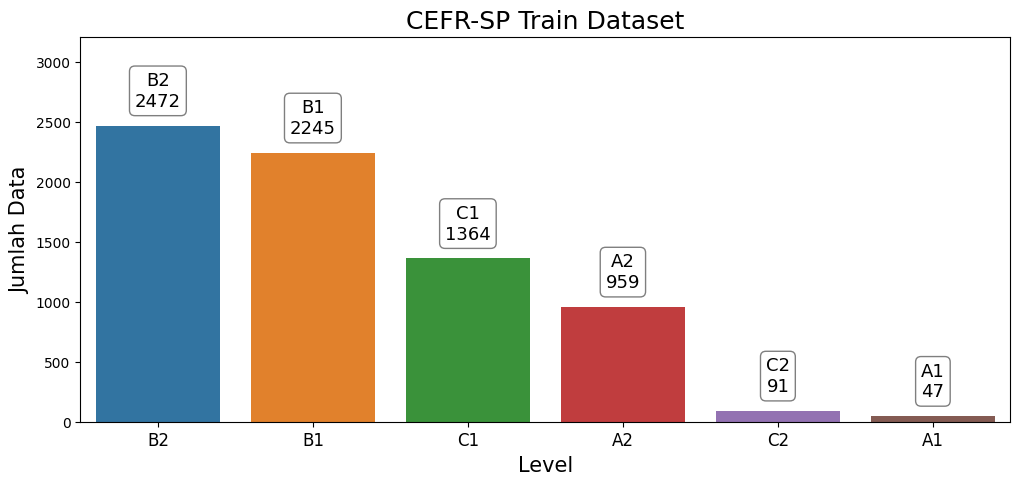

In [103]:
# Visualize CEFR-SP train dataset
vis_data(df_cefr_sp_train, "CEFR-SP Train Dataset")

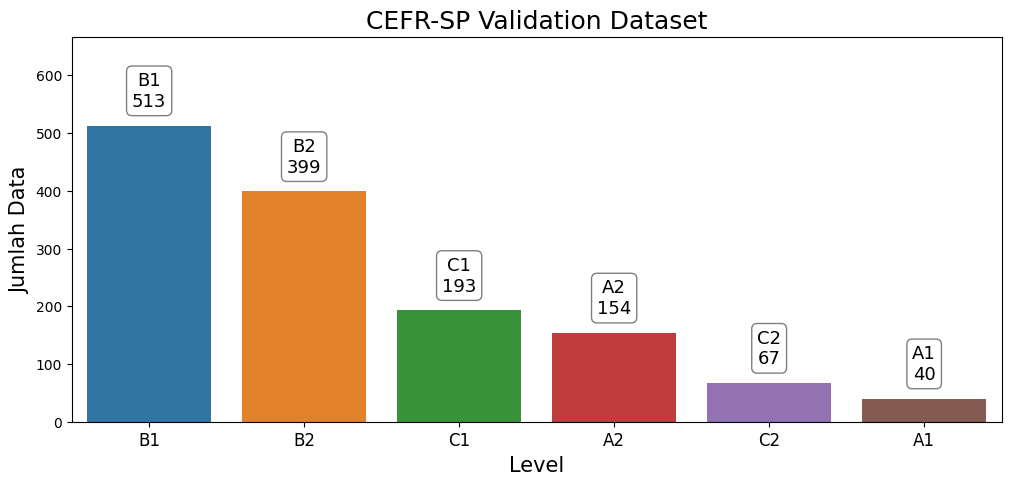

In [104]:
# Visualize CEFR-SP validation dataset
vis_data(df_cefr_sp_val, "CEFR-SP Validation Dataset")

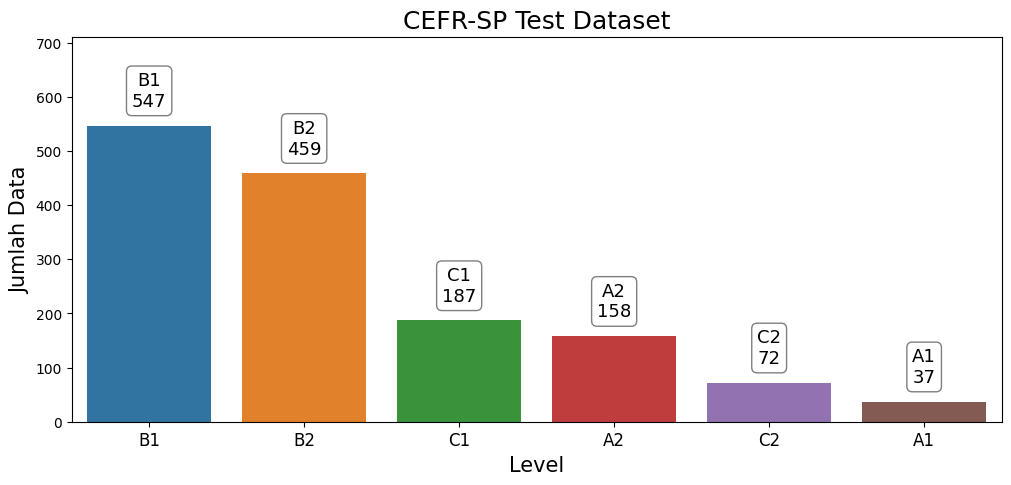

In [105]:
# Visualize CEFR-SP test dataset
vis_data(df_cefr_sp_test, "CEFR-SP Test Dataset")

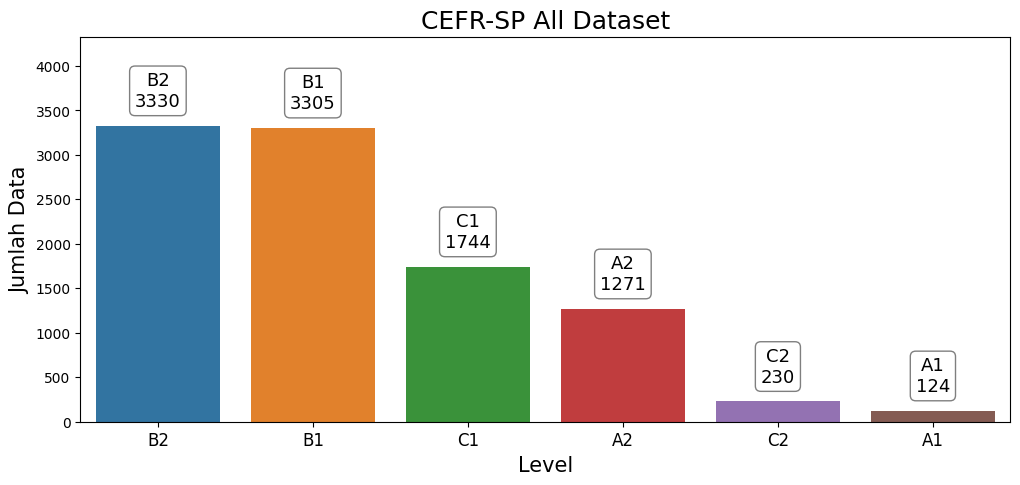

In [106]:
# Visualize CEFR-SP all dataset
vis_data(df_cefr_sp_all, "CEFR-SP All Dataset")

##### Kaggle

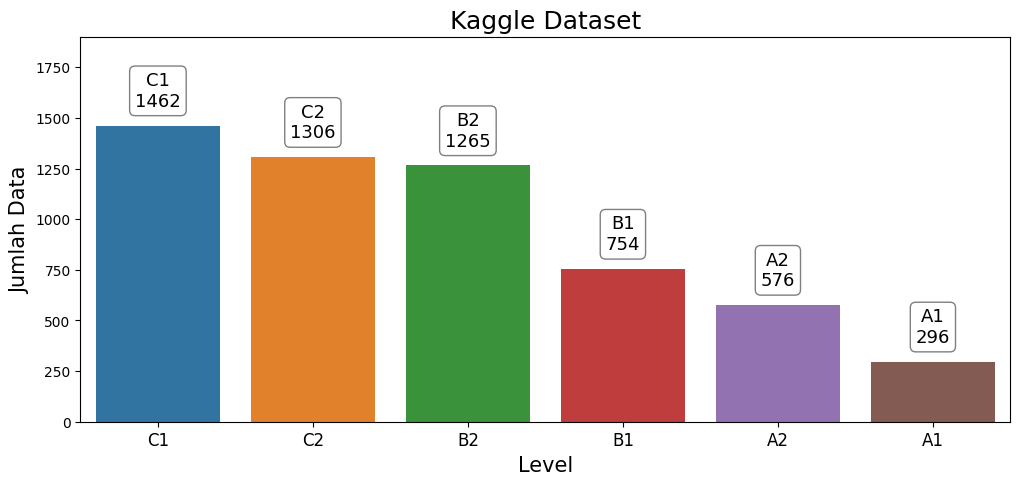

In [107]:
# Visualize Kaggle dataset
vis_data(df_kaggle, "Kaggle Dataset")

##### CERD

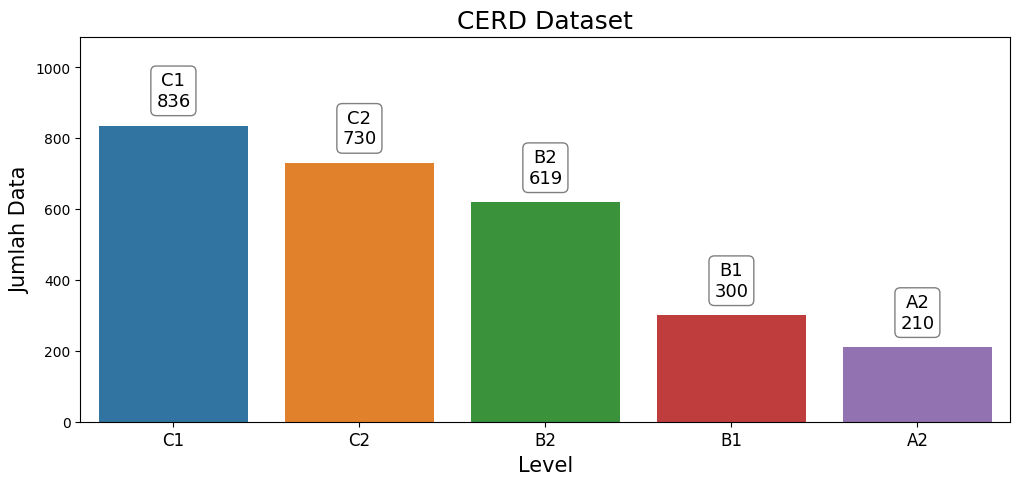

In [108]:
# Visualize CERD dataset
vis_data(df_cerd, "CERD Dataset")

##### Hugging Face

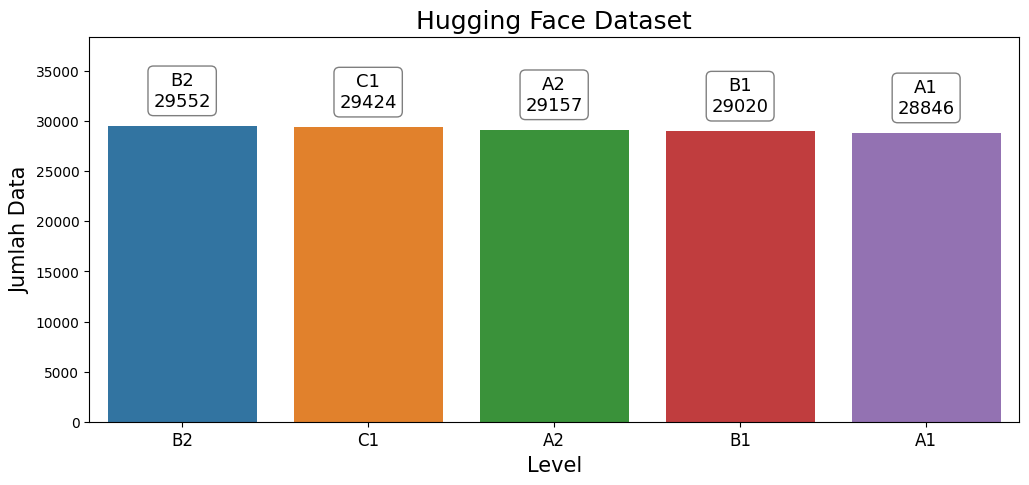

In [109]:
# Visualize Hugging Face dataset
vis_data(df_hugging_face, "Hugging Face Dataset")

##### All

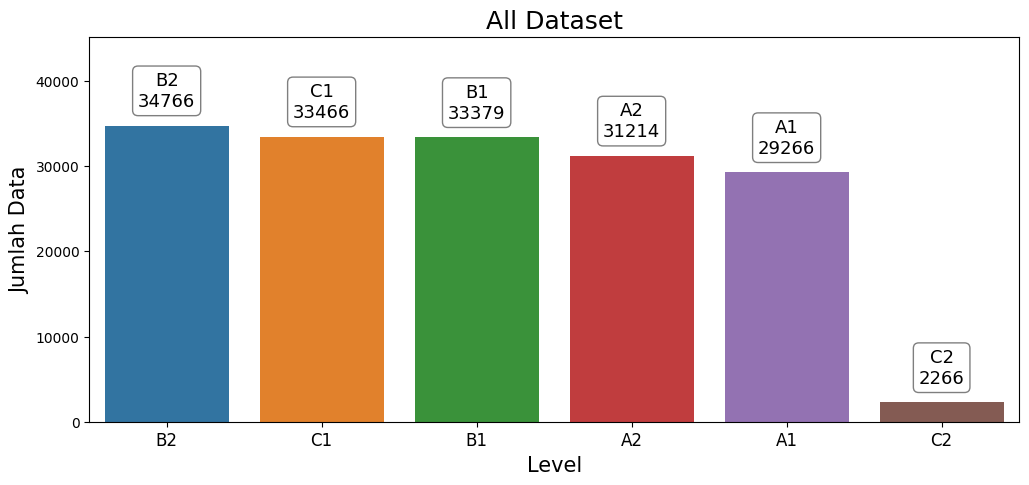

In [110]:
# Visualize all dataset
vis_data(df_all, "All Dataset")

### Dataset information ✅

#### CEFR-SP

In [111]:
# Display CEFR-SP train dataset
df_cefr_sp_train.head()

,Text,Level,A1,A2,B1,B2,C1,C2,Labels,Text Count
0,Is that your bike,A1,1,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]",4
1,She had a beautiful necklace around her neck .,A1,1,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]",9
2,I forgot to bring my umbrella .,A1,1,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]",7
3,The baby kept crying .,A1,1,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]",5
4,Do you know what you 're doing this weekend,A1,1,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]",9


In [112]:
# Display CEFR-SP train dataset information
df_cefr_sp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7178 entries, 0 to 7177
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        7178 non-null   object
 1   Level       7178 non-null   object
 2   A1          7178 non-null   uint8 
 3   A2          7178 non-null   uint8 
 4   B1          7178 non-null   uint8 
 5   B2          7178 non-null   uint8 
 6   C1          7178 non-null   uint8 
 7   C2          7178 non-null   uint8 
 8   Labels      7178 non-null   object
 9   Text Count  7178 non-null   int64 
dtypes: int64(1), object(3), uint8(6)
memory usage: 266.5+ KB


In [113]:
# Check isnull in CEFR-SP train dataset
df_cefr_sp_train.isnull().any()

Text          False
Level         False
A1            False
A2            False
B1            False
B2            False
C1            False
C2            False
Labels        False
Text Count    False
dtype: bool

In [114]:
# Display CEFR-SP validation dataset
df_cefr_sp_val.head()

,Text,Level,A1,A2,B1,B2,C1,C2,Labels,Text Count
0,Do you need something to eat,A1,1,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]",6
1,I have two fish in a bowl .,A1,1,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]",8
2,She wanted the grey coat .,A1,1,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]",6
3,I sent my girlfriend red roses .,A1,1,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]",7
4,She needs to use your phone .,A1,1,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]",7


In [115]:
# Display CEFR-SP validation dataset information
df_cefr_sp_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1366 entries, 0 to 1365
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        1366 non-null   object
 1   Level       1366 non-null   object
 2   A1          1366 non-null   uint8 
 3   A2          1366 non-null   uint8 
 4   B1          1366 non-null   uint8 
 5   B2          1366 non-null   uint8 
 6   C1          1366 non-null   uint8 
 7   C2          1366 non-null   uint8 
 8   Labels      1366 non-null   object
 9   Text Count  1366 non-null   int64 
dtypes: int64(1), object(3), uint8(6)
memory usage: 50.8+ KB


In [116]:
# Check isnull in CEFR-SP validation dataset
df_cefr_sp_val.isnull().any()

Text          False
Level         False
A1            False
A2            False
B1            False
B2            False
C1            False
C2            False
Labels        False
Text Count    False
dtype: bool

In [117]:
# Display CEFR-SP test dataset
df_cefr_sp_test.head()

,Text,Level,A1,A2,B1,B2,C1,C2,Labels,Text Count
0,I bought both of them .,A1,1,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]",6
1,Can you speak Thai,A1,1,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]",4
2,That dog running in circles is mine .,A1,1,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]",8
3,Please give me the time .,A1,1,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]",6
4,These seats are ours .,A1,1,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]",5


In [118]:
# Display CEFR-SP test dataset information
df_cefr_sp_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        1460 non-null   object
 1   Level       1460 non-null   object
 2   A1          1460 non-null   uint8 
 3   A2          1460 non-null   uint8 
 4   B1          1460 non-null   uint8 
 5   B2          1460 non-null   uint8 
 6   C1          1460 non-null   uint8 
 7   C2          1460 non-null   uint8 
 8   Labels      1460 non-null   object
 9   Text Count  1460 non-null   int64 
dtypes: int64(1), object(3), uint8(6)
memory usage: 54.3+ KB


In [119]:
# Check isnull in CEFR-SP test dataset
df_cefr_sp_test.isnull().any()

Text          False
Level         False
A1            False
A2            False
B1            False
B2            False
C1            False
C2            False
Labels        False
Text Count    False
dtype: bool

In [120]:
# Display CEFR-SP all dataset
df_cefr_sp_all.head()

,Text,Level,A1,A2,B1,B2,C1,C2,Labels,Text Count
0,Is that your bike,A1,1,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]",4
1,She had a beautiful necklace around her neck .,A1,1,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]",9
2,I forgot to bring my umbrella .,A1,1,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]",7
3,The baby kept crying .,A1,1,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]",5
4,Do you know what you 're doing this weekend,A1,1,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]",9


In [121]:
# Display CEFR-SP all information
df_cefr_sp_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        10004 non-null  object
 1   Level       10004 non-null  object
 2   A1          10004 non-null  uint8 
 3   A2          10004 non-null  uint8 
 4   B1          10004 non-null  uint8 
 5   B2          10004 non-null  uint8 
 6   C1          10004 non-null  uint8 
 7   C2          10004 non-null  uint8 
 8   Labels      10004 non-null  object
 9   Text Count  10004 non-null  int64 
dtypes: int64(1), object(3), uint8(6)
memory usage: 371.4+ KB


In [122]:
# Check isnull in CEFR-SP all dataset
df_cefr_sp_all.isnull().any()

Text          False
Level         False
A1            False
A2            False
B1            False
B2            False
C1            False
C2            False
Labels        False
Text Count    False
dtype: bool

#### Kaggle

In [123]:
# Display Kaggle dataset
df_kaggle.head()

,Text,Level,A1,A2,B1,B2,C1,C2,Labels,Text Count
0,"Hi I've been meaning to write for ages and finally today I'm actually doing something about it. Not that I'm trying to make excuses for myself, it's been really hard to sit down and write, as I've been moving around so much. Since we last saw each other I've unpacked my bags in four different cities. This job has turned out to be more of a whirlwind than I expected, but it's all goodI went from London to Prague to set up a new regional office there. You know I'd always wanted to go, but maybe I was imagining Prague in spring when I used to talk about that. Winter was really hard, with minus 15 degrees in the mornings and dark really early in the evening. But at least it was blue skies and white snow and not days on end of grey skies and rain, like at home",B2,0,0,0,1,0,0,"[0, 0, 0, 1, 0, 0]",150
1,"It's tough being away from home over Christmas, though, and Skype on Christmas Day wasn't really the same as being with everyone. From there I was on another three-month mission to oversee the set-up of the office in New York. Loved, loved, loved New York It's like being in one big TV show, as everywhere looks just a little bit familiar. I did every tourist thing you can think of when I wasn't working, and must have spent most of my salary on eating out. It was really hard to leave for the next job, especially as I kind of met someone More about Michael laterSo then I was posted to LA, which felt like a whole other country compared with the East Coast",B2,0,0,0,1,0,0,"[0, 0, 0, 1, 0, 0]",124
2,"I could definitely get used to that kind of outdoor, beach lifestyle, but I didn't spend as much time getting to know California as I could have because I was flying back to see Michael every other weekend. He came to see me when he could, but his job means he's often working at weekends, so he couldn't make the flight very often. Those three months flew by and then I was off again, to Frankfurt, which is where I am now. And … so is Michael He got a month off work and we're trying to work out how we can be in the same place at the same time for a while",B2,0,0,0,1,0,0,"[0, 0, 0, 1, 0, 0]",114
3,"We figure the first step in that direction is getting married, which is also why I wanted to write – I can't get married without my oldest friend there The wedding's going to be at home in London in September and I hope you can come Anyway, tell me all your news and I promise not to leave it so long this time Lots of love, Kath",B2,0,0,0,1,0,0,"[0, 0, 0, 1, 0, 0]",67
4,"It was not so much how hard people found the challenge but how far they would go to avoid it that left researchers gobsmacked. The task To sit in a chair and do nothing but think. So unbearable did some find it that they took up the safe but alarming opportunity to give themselves mild electric shocks in an attempt to break the tedium. Two-thirds of men pressed a button to deliver a painful jolt during a 15-minute spell of solitude. Under the same conditions, a quarter of women pressed the shock button. The difference, scientists suspect, is that men tend to be more sensation-seeking than women. The report from psychologists at Virginia and Harvard Universities is one of a surprising few to tackle the question of why most of us find it so hard to do nothing",B2,0,0,0,1,0,0,"[0, 0, 0, 1, 0, 0]",138


In [124]:
# Display Kaggle dataset information
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5659 entries, 0 to 5658
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        5659 non-null   object
 1   Level       5659 non-null   object
 2   A1          5659 non-null   uint8 
 3   A2          5659 non-null   uint8 
 4   B1          5659 non-null   uint8 
 5   B2          5659 non-null   uint8 
 6   C1          5659 non-null   uint8 
 7   C2          5659 non-null   uint8 
 8   Labels      5659 non-null   object
 9   Text Count  5659 non-null   int64 
dtypes: int64(1), object(3), uint8(6)
memory usage: 210.1+ KB


In [125]:
# Check isnull in Kaggle dataset
df_kaggle.isnull().any()

Text          False
Level         False
A1            False
A2            False
B1            False
B2            False
C1            False
C2            False
Labels        False
Text Count    False
dtype: bool

#### CERD

In [126]:
# Display CERD dataset
df_cerd.head()

,Text,Level,A1,A2,B1,B2,C1,C2,Labels,Text Count
0,Daniel Goleman examines the 'people skills' that are essential for a place at the top of your profession,C1,0,0,0,0,1,0,"[0, 0, 0, 0, 1, 0]",18
1,"The rules for work are changing, We are being judged by a new yardstick - not just by how clever we are, or by our training and expertise, but also by how well we handle ourselves and each other. This yardstick is increasingly used in choosing who will be hired and who will not, who will be passed over and who will not. The new rules can he used to indicate who is likely to become a star performer and who is more prone to mediocrity. And, no matter what field we work in currently, they measure the trait- that are crucial to our marketability for future jobs, These rules have little to do with what we were told at school was important. The ability to do well in examinations is largely irrelevant to this standard",C1,0,0,0,0,1,0,"[0, 0, 0, 0, 1, 0]",136
2,"The new measure takes it for granted that we all have enough intellectual ability and technical knowhow to do our jobs. It focuses instead on social skills and personal qualities, such as initiative and empathy, adaptability and persuasiveness - the 'people skills' that make up what is now commonly referred to as emotional intelligence.",C1,0,0,0,0,1,0,"[0, 0, 0, 0, 1, 0]",54
3,"In a time when few guarantees of job security have led to the very concept of a 'job' being rapidly replaced by 'portable skills', personal qualities begin to play an important role in the workplace. Talked about loosely for decades under a variety of names, from 'character' and 'personality' to 'soft skills', there is, at last, a more precise understanding of these human talents as well as a new name tor them. 'Emotional intelligence' is generally defined as the ability to monitor and regulate one's own and others' feelings, and to use feelings to guide thought and action. In our work-life it comprises basic elements self-awareness, self-regulation, motivation, empathy and adeptness in social relationships",C1,0,0,0,0,1,0,"[0, 0, 0, 0, 1, 0]",114
4,"There is a common assumption that it simply means 'being nice', However, at strategic moments it may demand not 'being nice', but rather, for example, bluntly confronting someone with the uncomfortable truth. Nor does emotional intelligence mean giving free rein to feelings - 'letting it all hang out'. Rather, it means managing feeling so that they are expressed appropriately and effectively, enabling people to work together smoothly towards their common goal.",C1,0,0,0,0,1,0,"[0, 0, 0, 0, 1, 0]",71


In [127]:
# Display CERD dataset information
df_cerd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2695 entries, 0 to 2694
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        2695 non-null   object
 1   Level       2695 non-null   object
 2   A1          2695 non-null   int64 
 3   A2          2695 non-null   uint8 
 4   B1          2695 non-null   uint8 
 5   B2          2695 non-null   uint8 
 6   C1          2695 non-null   uint8 
 7   C2          2695 non-null   uint8 
 8   Labels      2695 non-null   object
 9   Text Count  2695 non-null   int64 
dtypes: int64(2), object(3), uint8(5)
memory usage: 118.6+ KB


In [128]:
# Check isnull in CERD dataset
df_cerd.isnull().any()

Text          False
Level         False
A1            False
A2            False
B1            False
B2            False
C1            False
C2            False
Labels        False
Text Count    False
dtype: bool

#### Hugging Face

In [129]:
# Display Hugging Face dataset
df_hugging_face.head()

,Text,Level,C2,A1,A2,B1,B2,C1,Labels,Text Count
0,"From the beginning, with only a few minor lapses, the High King of Narnia did what was right because he saw it was right.",B2,0,0,0,0,1,0,"[0, 0, 0, 0, 1, 0]",24
1,"Millington, however, was a recalcitrant 'sex worker' who never recanted.",B2,0,0,0,0,1,0,"[0, 0, 0, 0, 1, 0]",10
2,"It does not, like most systems of teaching, try to make us deal with sectors of the personality that we personally experience as syntonic to our wellbeing.",C1,0,0,0,0,0,1,"[0, 0, 0, 0, 0, 1]",27
3,Jessica tilted her head toward the window.,A2,0,0,1,0,0,0,"[0, 0, 1, 0, 0, 0]",7
4,Psychoanalysis was both repressive and antirepressive.,A2,0,0,1,0,0,0,"[0, 0, 1, 0, 0, 0]",6


In [130]:
# Display Hugging Face dataset information
df_hugging_face.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145999 entries, 0 to 145998
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Text        145999 non-null  object
 1   Level       145999 non-null  object
 2   C2          145999 non-null  int64 
 3   A1          145999 non-null  uint8 
 4   A2          145999 non-null  uint8 
 5   B1          145999 non-null  uint8 
 6   B2          145999 non-null  uint8 
 7   C1          145999 non-null  uint8 
 8   Labels      145999 non-null  object
 9   Text Count  145999 non-null  int64 
dtypes: int64(2), object(3), uint8(5)
memory usage: 6.3+ MB


In [131]:
# Check isnull in Hugging Face dataset
df_hugging_face.isnull().any()

Text          False
Level         False
C2            False
A1            False
A2            False
B1            False
B2            False
C1            False
Labels        False
Text Count    False
dtype: bool

#### All

In [132]:
# Display all dataset
df_all.head()

,Text,Level,A1,A2,B1,B2,C1,C2,Labels,Text Count
0,Is that your bike,A1,1,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]",4
1,She had a beautiful necklace around her neck .,A1,1,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]",9
2,I forgot to bring my umbrella .,A1,1,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]",7
3,The baby kept crying .,A1,1,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]",5
4,Do you know what you 're doing this weekend,A1,1,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]",9


In [133]:
# Display all dataset information
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164357 entries, 0 to 145998
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Text        164357 non-null  object
 1   Level       164357 non-null  object
 2   A1          164357 non-null  int64 
 3   A2          164357 non-null  uint8 
 4   B1          164357 non-null  uint8 
 5   B2          164357 non-null  uint8 
 6   C1          164357 non-null  uint8 
 7   C2          164357 non-null  int64 
 8   Labels      164357 non-null  object
 9   Text Count  164357 non-null  int64 
dtypes: int64(3), object(3), uint8(4)
memory usage: 9.4+ MB


In [134]:
# Check isnull in all dataset
df_all.isnull().any()

Text          False
Level         False
A1            False
A2            False
B1            False
B2            False
C1            False
C2            False
Labels        False
Text Count    False
dtype: bool

### Select dataset ✅

#### CEFR-SP (Optional)

In [ ]:
# Select data for training from CEFR-SP
df_training = df_cefr_sp_all

#### Kaggle (Optional)

In [ ]:
# Select data for training from Kaggle
df_training = df_kaggle

#### CERD (Optional)

In [ ]:
# Select data for training from CERD
df_training = df_cerd

#### Hugging Face (Optional)

In [ ]:
# Select data for training from Hugging Face
df_training = df_hugging_face

#### All (Optional)

In [ ]:
# Select data for training from all dataset
df_training = df_all

#### Cut

In [135]:
# Select dataset
df_cut = df_kaggle

In [136]:
# Define sample
sample_data = 296

In [137]:
# Select data every class
df_a1 = df_cut[df_cut["Level"] == "A1"].sample(n = sample_data)
df_a2 = df_cut[df_cut["Level"] == "A2"].sample(n = sample_data)
df_b1 = df_cut[df_cut["Level"] == "B1"].sample(n = sample_data)
df_b2 = df_cut[df_cut["Level"] == "B2"].sample(n = sample_data)
df_c1 = df_cut[df_cut["Level"] == "C1"].sample(n = sample_data)
df_c2 = df_cut[df_cut["Level"] == "C2"].sample(n = sample_data)

In [138]:
# Merging selected dataset
df_cut_final = pd.concat([df_a1, df_a2, df_b1, df_b2, df_c1, df_c2])

In [139]:
# Select data for training from cut dataset
df_training = df_cut_final

### Check dataset ✅

In [140]:
# Display dataset for training
df_training.head()

,Text,Level,A1,A2,B1,B2,C1,C2,Labels,Text Count
4141,"Come on, Lisa. Let's play a game. Okay, Joey. What shall we play How about kickball. It's fun. Okay, but I don't know how. It's easy, Jenny. You just kick the ball. I know that, but where do we kick it Just anywhere. It's a lot of fun. Hey, this is fun. Thanks, Joey.",A1,1,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]",54
4198,"Tracy looked at the flag. The flag is red, white, and blue. It has 50 white stars. The white stars are on a blue square. The flag has six white stripes. It has seven red stripes. All the stripes are horizontal. They are not vertical. The stripes do not go up and down. They go from left to right. Tracy loves her flag. It is the flag of her country. It is a pretty flag. No other flag has 50 stars. No other flag has 13 stripes.",A1,1,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]",87
4334,"From Pradeep Ranatunga To Carolina Kemper Subject Thank you Hi Carolina, I just wanted to write and say thank you for everything. You and your family were amazing hosts. I had a great time at your house. Thank you for making me feel at home. I'm sure my English improved a lot because of all your help too Also, thank you for all the wonderful cooking you did. Now I can tell everyone English food is not as bad as they say . If you ever come to Sri Lanka, I hope you will stay with me and I can show you my city too. Keep in touch. Pradeep",A1,1,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]",109
4110,"Finally, he wiped down the table. Next, Jack watched TV.",A1,1,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]",10
4160,"Hi Betty. Want to go for a ride Where to, Sarah Nowhere special. Just a ride. That sounds like fun. Yes. It is. Do you have enough gas Yes, I do. Here is some money for gas anyway.",A1,1,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]",38


In [141]:
# Display training dataset information
df_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1776 entries, 4141 to 5483
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Text        1776 non-null   object
 1   Level       1776 non-null   object
 2   A1          1776 non-null   uint8 
 3   A2          1776 non-null   uint8 
 4   B1          1776 non-null   uint8 
 5   B2          1776 non-null   uint8 
 6   C1          1776 non-null   uint8 
 7   C2          1776 non-null   uint8 
 8   Labels      1776 non-null   object
 9   Text Count  1776 non-null   int64 
dtypes: int64(1), object(3), uint8(6)
memory usage: 79.8+ KB


In [142]:
# Check isnull in training dataset
df_training.isnull().any()

Text          False
Level         False
A1            False
A2            False
B1            False
B2            False
C1            False
C2            False
Labels        False
Text Count    False
dtype: bool

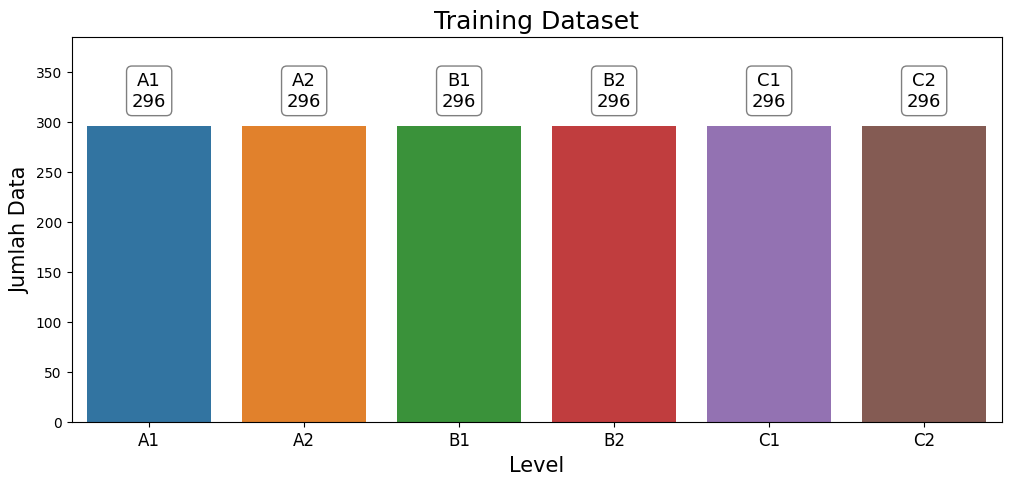

In [143]:
# Visualize CEFR-SP all dataset
vis_data(df_training, "Training Dataset")

### Split dataset ✅

In [144]:
# Identify X dan y
x_training = df_training["Text"]
y_training = df_training[["A1", "A2", "B1", "B2", "C1", "C2"]]

In [145]:
# Split dataset
x_train, x_test, y_train, y_test = train_test_split(x_training, y_training, test_size=0.2, random_state=4)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=4)

In [146]:
# Data check
print("Total training data     ", len(x_train.index), " line.")
print("Total validation data   ", len(x_valid.index), " line.")
print("Total test data         ", len(x_test.index), " line.")

Total training data      1136  line.
Total validation data    284  line.
Total test data          356  line.


In [147]:
# Value count dataset
df_training["Level"].value_counts()

A1    296
A2    296
B1    296
B2    296
C1    296
C2    296
Name: Level, dtype: int64

## Tokenization 🆗

### Install and import library ✅

In [148]:
# Install library
%%capture
!pip install transformers

In [149]:
# Import library 
import tensorflow as tf
from transformers import DistilBertTokenizerFast

### Define function and params ✅

In [161]:
# Define params
params = {"MAX_LENGTH": 512,
          "EPOCHS": 3,
          "LEARNING_RATE": 1e-4,
          "FT_EPOCHS": 3,
          'FT_LEARNING_RATE': 1e-5,
          "OPTIMIZER": "adam",
          "FL_GAMMA": 2.0,
          "FL_ALPHA": 0.2,
          "BATCH_SIZE": 16,
          "VERBOSE": 2,
          "NUM_STEPS": len(x_train.index) // 16,
          "DISTILBERT_DROPOUT": 0.5,
          "DISTILBERT_ATT_DROPOUT": 0.2,
          "LAYER_DROPOUT": 0.2,
          "DENSE_ACTIVATION": "tanh",
          "LSTM_ACTIVATION": "tanh",
          "OUTPUT_ACTIVATION": "softmax",
          "DENSE_BIAS": "zeros",
          "KERNEL_INITIALIZER": "GlorotNormal",
          "BIAS_INITIALIZER": "zeros",
          "POS_PROBA_THRESHOLD": 0.5,          
          "ADDED_LAYERS": "Dense 256, Dense 128, Dense 32, Dropout 0.2",
          "LR_SCHEDULE": "1e-5 for 10 epochs, Fine-tune w/ adam for 5 epochs @1e-6",
          "FREEZING": "All DistilBERT layers frozen for 10 epochs, then unfrozen for 5",
          "RANDOM_STATE": 42,
          }

In [151]:
# Define encode function
def batch_encode(tokenizer, texts, batch_size=params["BATCH_SIZE"], max_length=params["MAX_LENGTH"]):
    input_ids = []
    attention_mask = []
    
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        inputs = tokenizer.batch_encode_plus(batch,
                                             max_length=max_length,
                                             padding="max_length",
                                             truncation=True,
                                             return_attention_mask=True,
                                             return_token_type_ids=False
                                             )
        input_ids.extend(inputs["input_ids"])
        attention_mask.extend(inputs["attention_mask"])
        
    return tf.convert_to_tensor(input_ids), tf.convert_to_tensor(attention_mask)

### Init tokenizer ✅

In [152]:
# Init distilBERT token
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

### Tokenize dataset ✅

In [153]:
# Encode X_train
X_train_ids, X_train_attention = batch_encode(tokenizer, x_train.tolist())

# Encode X_valid
X_valid_ids, X_valid_attention = batch_encode(tokenizer, x_valid.tolist())

# Encode X_test
X_test_ids, X_test_attention = batch_encode(tokenizer, x_test.tolist())

## Training 🆗

### Import library ✅

In [154]:
# Import library
import time
from tensorflow.keras import backend as K
from transformers import DistilBertConfig, TFDistilBertModel

### Define function ✅


In [155]:
# Define timer
def timer(start, end):
    hours, rem = divmod(end-start, 3600)
    minutes, seconds = divmod(rem, 60)
    print("{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

In [156]:
# Define focal loss function
def focal_loss(gamma=params["FL_GAMMA"], alpha=params["FL_ALPHA"]):
    
    def focal_loss_fixed(y_true, y_pred):
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -K.mean(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1)) - K.mean((1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0))
    
    return focal_loss_fixed

In [157]:
# Define neural network function
def build_model_nn(transformer, max_length=params["MAX_LENGTH"]):
    
    # Define weight
    weight_initializer = tf.keras.initializers.GlorotNormal(seed=params["RANDOM_STATE"]) 
    
    # Define input
    input_ids_layer = tf.keras.layers.Input(shape=(max_length,), 
                                            name="input_ids", 
                                            dtype="int32",
                                           )
    input_attention_layer = tf.keras.layers.Input(shape=(max_length,), 
                                                  name="input_attention", 
                                                  dtype="int32",
                                                 )
    # The output of the DistilBERT model is a tuple with the element at index 0
    # hidden-state output representation of the last model layer
    # with a tf.Tensor of size (batch_size, sequence_length, hidden_size=768).
    last_hidden_state = transformer.distilbert([input_ids_layer, input_attention_layer])[0]
    
    # We will use DistilBERT output for the [CLS] token located at index 0.
    # So we will do token splicing [CLS] which gives a 2D data.
    cls_token = last_hidden_state[:, 0, :]
    
    D1 = tf.keras.layers.Dropout(params["LAYER_DROPOUT"],
                                 seed=params["RANDOM_STATE"],
                                 name="Dropout_1",
                                )(cls_token)

    Dense1 = tf.keras.layers.Dense(256,
                                   activation=params["DENSE_ACTIVATION"],
                                   kernel_initializer=weight_initializer,
                                   bias_initializer=params["DENSE_BIAS"],
                                   name="Dense_1",
                                  )(D1)
    
    D2 = tf.keras.layers.Dropout(params["LAYER_DROPOUT"],
                                 seed=params["RANDOM_STATE"],
                                 name="Dropout_2",
                                )(Dense1)
    
    Dense2 = tf.keras.layers.Dense(128,
                                   activation=params["DENSE_ACTIVATION"],
                                   kernel_initializer=weight_initializer,
                                   bias_initializer=params["DENSE_BIAS"],
                                   name="Dense_2",
                                  )(D2)
    
    D3 = tf.keras.layers.Dropout(params["LAYER_DROPOUT"],
                                 seed=params["RANDOM_STATE"],
                                 name="Dropout_3",
                                )(Dense2)

    Dense3 = tf.keras.layers.Dense(32,
                                   activation=params["DENSE_ACTIVATION"],
                                   kernel_initializer=weight_initializer,
                                   bias_initializer=params["DENSE_BIAS"],
                                   name="Dense_3",
                                  )(D3)

    D4 = tf.keras.layers.Dropout(params["LAYER_DROPOUT"],
                                 seed=params["RANDOM_STATE"],
                                 name="Dropout_4",
                                )(Dense3)
                                
    output = tf.keras.layers.Dense(6, 
                                   activation=params["OUTPUT_ACTIVATION"],
                                   kernel_initializer=weight_initializer,
                                   bias_initializer=params["DENSE_BIAS"],
                                   name="Output",
                                  )(D4)
    
    # Define model
    model = tf.keras.Model([input_ids_layer, input_attention_layer], output, name="IELTS_lexical_nn_model_all_data_cut")
    
    # Compile model
    model.compile(tf.keras.optimizers.Adam(learning_rate=params["LEARNING_RATE"]), 
                  loss=focal_loss(),
                  metrics=["accuracy"],
                 )
    
    return model

### Build model ✅

In [158]:
# Config DistilBERT model
config = DistilBertConfig(dropout=params["DISTILBERT_DROPOUT"], 
                          attention_dropout=params["DISTILBERT_ATT_DROPOUT"], 
                          output_hidden_states=True,
                         )

# Init DistilBERT model
distilBERT = TFDistilBertModel.from_pretrained("distilbert-base-uncased", config=config)

# Freezes the layer in the DistilBERT model to maintain the pre-trained weights
for layer in distilBERT.layers:
    layer.trainable = False

# Build model
model = build_model_nn(distilBERT)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_layer_norm', 'vocab_transform', 'vocab_projector', 'activation_13']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


### Display model structure ✅

In [159]:
# Display model structure
model.summary()

Model: "IELTS_lexical_nn_model_all_data_cut"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 512)]        0           []                               
                                                                                                  
 input_attention (InputLayer)   [(None, 512)]        0           []                               
                                                                                                  
 distilbert (TFDistilBertMainLa  TFBaseModelOutput(l  66362880   ['input_ids[0][0]',              
 yer)                           ast_hidden_state=(N               'input_attention[0][0]']        
                                one, 512, 768),                                                   
                                 hidden_states=((No             

### Pre-training model ✅

In [162]:
# Training model
time_training_init = time.time()

train_history = model.fit(
    x = [X_train_ids, X_train_attention],
    y = y_train.to_numpy(),
    epochs = params["EPOCHS"],
    batch_size = params["BATCH_SIZE"],
    steps_per_epoch = params["NUM_STEPS"],
    validation_data = ([X_valid_ids, X_valid_attention], y_valid.to_numpy()),
    verbose=params["VERBOSE"],
)

time_training_end = time.time()
time_training = time_training_init - time_training_end

print("Training time:")
timer(time_training_init, time_training_end)

Epoch 1/3
71/71 - 2131s - loss: 0.0512 - accuracy: 0.2121 - val_loss: 0.0380 - val_accuracy: 0.3838 - 2131s/epoch - 30s/step
Epoch 2/3
71/71 - 2119s - loss: 0.0447 - accuracy: 0.3019 - val_loss: 0.0324 - val_accuracy: 0.4754 - 2119s/epoch - 30s/step
Epoch 3/3
71/71 - 2124s - loss: 0.0417 - accuracy: 0.3354 - val_loss: 0.0312 - val_accuracy: 0.4718 - 2124s/epoch - 30s/step
Training time:
01:46:13.39


### Config model for Fine-tuning ✅

In [ ]:
# Unfreeze the DistilBERT model layer weights for fine-tuning
for layer in distilBERT.layers:
    layer.trainable = True

# Define optimizer for fine-tuning
optimizer = tf.keras.optimizers.Adam(learning_rate=params["FT_LEARNING_RATE"])

# Compile model
model.compile(optimizer=optimizer, 
              loss=focal_loss(),
              metrics=["accuracy"],
             )

### Fine-tuning ✅

In [ ]:
# Fine-tuning model
time_fine_tunning_init = time.time()

finetuning_history = model.fit(
    x = [X_train_ids, X_train_attention],
    y = y_train.to_numpy(),
    epochs = params["FT_EPOCHS"],
    batch_size = params["BATCH_SIZE"],
    steps_per_epoch = params["NUM_STEPS"],
    validation_data = ([X_valid_ids, X_valid_attention], y_valid.to_numpy()),
    verbose=params["VERBOSE"],
)

time_fine_tunning_end = time.time()
time_fine_tunning = time_fine_tunning_end-time_fine_tunning_init

print("Fine-Tunning time:")
timer(time_fine_tunning_init, time_fine_tunning_end)

## Evaluate and predict 🆗

### Install and import library ✅

In [163]:
# Install library
%%capture
!pip install scikit-plot

In [164]:
# Import library
import scikitplot as skplt
from sklearn import metrics

### Evaluate model ✅

In [165]:
# Evaluate model
eval_loss, eval_accuracy = model.evaluate([X_test_ids, X_test_attention],
                                          y_test.to_numpy(),
                                          batch_size=params["BATCH_SIZE"],
                                          verbose=params["VERBOSE"],
                                         )
print("Evaluation Loss:", eval_loss)
print("Evaluation Accuracy:", eval_accuracy)

KeyboardInterrupt: ignored

### Predict model ✅

In [ ]:
# Value for predict
print("Value token X ids:")
print(X_test_ids[20:21])

print("Value token X attention:")
print(X_test_attention[20:21])

print("Value y:")
print(y_test.to_numpy()[20:21])

In [ ]:
# Predict
pred = model.predict([X_test_ids[20:21], X_test_attention[20:21]])
print("Prediction probability:", pred)

tar = np.argmax(y_test.to_numpy()[20:21], axis = 1)
print("Target class: ", tar)

classes = np.argmax(pred, axis = 1)
print("Predict class: ", classes)

### Get training process data ✅

In [ ]:
# Make dataset history
history_train = pd.DataFrame(train_history.history)
history_finetuning = pd.DataFrame(finetuning_history.history)
history = pd.concat([history_train, history_finetuning], ignore_index=True)

In [ ]:
# Get training loss information
epoch_train_loss = int(history[history["loss"] == history["loss"].min()].index.values[0])
epoch_val_loss = int(history[history["val_loss"] == history["val_loss"].min()].index.values[0])
train_loss_min = float("{:0.4f}".format(history["loss"].min()))
val_loss_min = float("{:0.4f}".format(history["val_loss"].min()))

In [ ]:
# Get training accuracy information
epoch_train_accuracy = int(history[history["accuracy"] == history["accuracy"].max()].index.values[0])
epoch_val_accuracy = int(history[history["val_accuracy"] == history["val_accuracy"].max()].index.values[0])
train_accuracy_max = float("{:0.4f}".format(history["accuracy"].max()))
val_accuracy_max = float("{:0.4f}".format(history["val_accuracy"].max()))

In [ ]:
# Get predict from test dataset
y_pred = model.predict([X_test_ids, X_test_attention])
y_pred_thresh = np.argmax(y_test.to_numpy(), axis=1)
classes = np.argmax(y_pred, axis=1)

### Visualize training process ✅

In [ ]:
# Define name of file
loss_filename = "loss_all_cut.png"
acc_filename = "acc_all_cut.png"
cm_filename = "confusion_matrix_all_cut.png"

In [ ]:
# Ploting training loss information 
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(history.loc[:, ["loss", "val_loss"]])
ax.legend(labels=["loss", "val_loss"])

ax.annotate(
    f"Min \nTrain Loss = {train_loss_min}\nEpoch = {epoch_train_loss}",
    xy=(epoch_train_loss, train_loss_min), xycoords="data",
    xytext=(-60, 120), textcoords="offset points",
    bbox=dict(boxstyle="round", fc="0.8"),
    arrowprops=dict(arrowstyle="->",
                    connectionstyle="angle,angleA=0,angleB=90,rad=10"))
ax.annotate(
    f"Min \nVal Loss = {val_loss_min}\nEpoch = {epoch_val_loss}",
    xy=(epoch_val_loss, val_loss_min), xycoords="data",
    xytext=(-60, 120), textcoords="offset points",
    bbox=dict(boxstyle="round", fc="0.8"),
    arrowprops=dict(arrowstyle="->",
                    connectionstyle="angle,angleA=0,angleB=90,rad=10"))

plt.title(label="Training and Validation Loss All Cut", fontsize=17, pad=19)
plt.xlabel("Epoch", labelpad=14, fontsize=14)
plt.ylabel("Focal Loss", labelpad=16, fontsize=14)

print("Min Train Loss:", train_loss_min)
print("Min Validation Loss:", val_loss_min)

# Save data in image
plt.savefig(loss_filename, dpi=300.0, transparent=True)

In [ ]:
# Ploting training accuracy information
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(history.loc[:, ["accuracy", "val_accuracy"]])
ax.legend(labels=["accuracy", "val_accuracy"])

ax.annotate(
    f"Max \nTrain Acc = {train_accuracy_max}\nEpoch = {epoch_train_accuracy}",
    xy=(epoch_train_accuracy, train_accuracy_max), xycoords="data",
    xytext=(-60, -180), textcoords="offset points",
    bbox=dict(boxstyle="round", fc="0.8"),
    arrowprops=dict(arrowstyle="->",
                    connectionstyle="angle,angleA=0,angleB=90,rad=10"))
ax.annotate(
    f"Max \nVal Acc = {val_accuracy_max}\nEpoch = {epoch_val_accuracy}",
    xy=(epoch_val_accuracy, val_accuracy_max), xycoords="data",
    xytext=(-60, -180), textcoords="offset points",
    bbox=dict(boxstyle="round", fc="0.8"),
    arrowprops=dict(arrowstyle="->",
                    connectionstyle="angle,angleA=0,angleB=90,rad=10"))

plt.title(label="Training and Validation Accuracy All Cut", fontsize=17, pad=19)
plt.xlabel("Epoch", labelpad=14, fontsize=14)
plt.ylabel("Accuracy", labelpad=16, fontsize=14)

print("Max Train Accuracy:", train_accuracy_max)
print("Max Validation Accuracy:", val_accuracy_max)

# Save data in image
plt.savefig(acc_filename, dpi=300.0, transparent=True)

In [ ]:
# Ploting confusion matrix
skplt.metrics.plot_confusion_matrix(y_pred_thresh,
                                    classes,
                                    figsize=(6, 6),
                                    text_fontsize=14,
                                   )

plt.title(label="Confusion Matrix All Cut", fontsize=20, pad=17)
plt.ylabel("Predicted Label", labelpad=14)
plt.xlabel("True Label", labelpad=14)

# Save data in image
plt.savefig(cm_filename, dpi=300.0, transparent=True)

In [ ]:
# Print classification report
print(metrics.classification_report(y_pred_thresh, classes, digits=3))

## Save model 🆗

### Import library ✅

In [ ]:
# Import library
import pickle

### Save model ✅

In [ ]:
# Define name of file
model_h5 = "ielts_lexical_all_cut.h5"
model_zip = "ielts_lexical_all_cut.zip"
model_directory = "ielts_lexical_all_cut"
tokenizer_directory = "tokenizer_ielts_lexical_all_cut.pickle"
base_colab_path = "/content/"
base_drive_path = "/content/drive/MyDrive/Capstone Project/Lexical/Model/Version 3/All Cut"

In [ ]:
# Save model and tokenizer
model.save(model_h5)
model.save(model_directory)
with open(tokenizer_directory, "wb") as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# Zip file
!zip -r model_zip "ielts_lexical_all_cut/"

In [ ]:
# Save model to drive
!cp -r base_colab_path+model_h5 base_drive_path
!cp -r base_colab_path+model_directory base_drive_path
!cp -r base_colab_path+model_zip base_drive_path
!cp -r base_colab_path+tokenizer_directory base_drive_path
!cp -r base_colab_path+loss_filename base_drive_path
!cp -r base_colab_path+acc_filename base_drive_path
!cp -r base_colab_path+cm_filename base_drive_path

## Load model 🆗

### Install and import library ✅

In [ ]:
# Install library
%%capture
!pip install transformers
!pip install -U openai-whisper

In [ ]:
# Import library
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K
from transformers import DistilBertTokenizerFast
import whisper
import pickle

### Define function ✅

In [ ]:
# Define loss function
def custom_focal_loss(gamma=2.0, alpha=0.2):
    
    def focal_loss_fixed(y_true, y_pred):
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -K.mean(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1)) - K.mean((1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0))
    
    return focal_loss_fixed

In [ ]:
# Define encode function
def encode_batch(tokenizer, texts, batch_size=16, max_length=512):
    input_ids = []
    attention_mask = []
    
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        inputs = tokenizer.batch_encode_plus(batch,
                                             max_length=max_length,
                                             padding="max_length",
                                             truncation=True,
                                             return_attention_mask=True,
                                             return_token_type_ids=False
                                             )
        input_ids.extend(inputs["input_ids"])
        attention_mask.extend(inputs["attention_mask"])
        
    return tf.convert_to_tensor(input_ids), tf.convert_to_tensor(attention_mask)

In [ ]:
# Define ASR function
def speech_to_text(model_base, audio_path):
    result = model_base.transcribe(audio_path)
    
    return result["text"]

### Drive Access ✅

In [ ]:
# Akses drive
from google.colab import drive

drive.mount("/content/drive")

### Load model ✅

In [ ]:
# Define path
model_folder_dir = "/content/drive/MyDrive/Capstone Project/Lexical/Model/Version 3/All Cut/ielts_lexical_all_cut"
model_h5_dir = "/content/drive/MyDrive/Capstone Project/Lexical/Model/Version 3/All Cut/ielts_lexical_all_cut.h5"
tokenizer_dir = "/content/drive/MyDrive/Capstone Project/Lexical/Model/Version 3/All Cut/tokenizer_ielts_lexical_all_cut.pickle"

In [ ]:
# Load model folder
load_model_folder = tf.keras.models.load_model(model_folder_dir, custom_objects={"focal_loss_fixed": custom_focal_loss()})

In [ ]:
# Info model folder
load_model_folder.summary()

In [ ]:
# Load model h5
load_model_h5 = tf.keras.models.load_model(model_h5_dir, custom_objects={"focal_loss_fixed": custom_focal_loss()})

In [ ]:
# Info model h5
load_model_h5.summary()

In [ ]:
# Load tokenizer
with open(tokenizer_dir, "rb") as handle:
    load_tokenizer = pickle.load(handle)

In [ ]:
# Initialize ASR
model_base = whisper.load_model("base.en")

In [ ]:
# Speect to text
asr = speech_to_text(model_base, "https://res.cloudinary.com/dntqqcuci/video/upload/v1683802365/hfxnaqru0kkh4qobnmwo.wav")

In [ ]:
# Data test to list
testing = [asr]

In [ ]:
# Tokenisasi
test_ids, test_attention = encode_batch(load_tokenizer, testing)

In [ ]:
# Predict
pred = modelss.predict([test_ids, test_attention])
print("Prediction probability:", pred)

classes = np.argmax(pred, axis = 1)
print("Predict: ", classes)

# Install and import library

In [ ]:
# Install library
%%capture
!pip install datasets

In [ ]:
# Import library
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset, load_from_disk
from sklearn.model_selection import train_test_split

In [ ]:
# Make pandas dataframe big
pd.set_option("display.max_colwidth", None)

# Collect dataset

In [ ]:
# Drive access
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


## CEFR-SP

In [ ]:
# Copy dataset
!cp -r /content/drive/MyDrive/"Capstone Project"/Lexical/Dataset/CEFR-SP/CEFR-SP.zip /content/

In [ ]:
# Unzip dataset
!unzip CEFR-SP.zip

Archive:  CEFR-SP.zip
   creating: SCoRE/
 extracting: SCoRE/CEFR-SP_SCoRE_test.txt  
   creating: Wiki-Auto/
 extracting: Wiki-Auto/CEFR-SP_Wikiauto_test.txt  
 extracting: README.md               
 extracting: SCoRE/CEFR-SP_SCoRE_dev.txt  
 extracting: SCoRE/CEFR-SP_SCoRE_train.txt  
 extracting: Wiki-Auto/CEFR-SP_Wikiauto_dev.txt  
 extracting: Wiki-Auto/CEFR-SP_Wikiauto_train.txt  


In [ ]:
# Path init CEFR-SP dataset SCoRE
SCoRE_val = "SCoRE/CEFR-SP_SCoRE_dev.txt"
SCoRE_test = "SCoRE/CEFR-SP_SCoRE_test.txt"
SCoRE_train = "SCoRE/CEFR-SP_SCoRE_train.txt"

In [ ]:
# Path init CEFR-SP dataset WikiAuto
WikiAuto_val = "Wiki-Auto/CEFR-SP_Wikiauto_dev.txt"
WikiAuto_test = "Wiki-Auto/CEFR-SP_Wikiauto_test.txt"
WikiAuto_train = "Wiki-Auto/CEFR-SP_Wikiauto_train.txt"

## Kaggle

### Kaggle API

In [ ]:
# Copy Kaggle json
!cp -r /content/drive/MyDrive/"Capstone Project"/Lexical/Dataset/Kaggle/kaggle.json /content/

In [ ]:
# Save Kaggle API key to colab
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download dataset
!kaggle datasets download amontgomerie/cefr-levelled-english-texts

  0% 0.00/1.36M [00:00<?, ?B/s]
100% 1.36M/1.36M [00:00<00:00, 160MB/s]


In [ ]:
# Unzip dataset
!unzip cefr-levelled-english-texts.zip

Archive:  cefr-levelled-english-texts.zip
  inflating: cefr_leveled_texts.csv  


In [ ]:
# Define path
kaggle_path = "cefr_leveled_texts.csv"

### Direct

In [ ]:
# Define path
kaggle_path = "content/drive/MyDrive/Capstone Project/Lexical/Dataset/Kaggle/cefr_leveled_texts.csv"

## CERD

In [ ]:
# Copy dataset
!cp -r /content/drive/MyDrive/"Capstone Project"/Lexical/Dataset/CERD/Readability_dataset_clean.zip /content/

In [ ]:
# Unzip data
!unzip "Readability_dataset_clean.zip"

Archive:  Readability_dataset_clean.zip
   creating: Readability_dataset_clean/
  inflating: __MACOSX/._Readability_dataset_clean  
  inflating: Readability_dataset_clean/.DS_Store  
  inflating: __MACOSX/Readability_dataset_clean/._.DS_Store  
   creating: Readability_dataset_clean/CAE/
  inflating: __MACOSX/Readability_dataset_clean/._CAE  
   creating: Readability_dataset_clean/PET/
  inflating: __MACOSX/Readability_dataset_clean/._PET  
   creating: Readability_dataset_clean/CPE/
  inflating: __MACOSX/Readability_dataset_clean/._CPE  
   creating: Readability_dataset_clean/FCE/
  inflating: __MACOSX/Readability_dataset_clean/._FCE  
   creating: Readability_dataset_clean/KET/
  inflating: __MACOSX/Readability_dataset_clean/._KET  
  inflating: Readability_dataset_clean/CAE/29.txt  
  inflating: __MACOSX/Readability_dataset_clean/CAE/._29.txt  
  inflating: Readability_dataset_clean/CAE/15.txt  
  inflating: __MACOSX/Readability_dataset_clean/CAE/._15.txt  
  inflating: Readability_

In [ ]:
# Define path
cerd_path = "Readability_dataset_clean"

## Hugging Face

### API

In [ ]:
# Import dataset from Hugging Face
hugging_face_dataset = load_dataset("sebastiaan/test-cefr")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset test-cefr downloaded and prepared to /root/.cache/huggingface/datasets/sebastiaan___test-cefr/default/1.1.0/4ece2d47bd5959f302268b68b2fd1fc0e0b43efb0ce1e7edba8e642e8349c4c9. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
# Define dataset
hugging_face_train = hugging_face_dataset["train"]
hugging_face_test = hugging_face_dataset["test"]
hugging_face_val = hugging_face_dataset["validation"]

### Local

In [ ]:
# Copy dataset
!cp -r /content/drive/MyDrive/"Capstone Project"/Lexical/Dataset/"Hugging Face"/hugging_face_dataset.zip /content/

In [ ]:
# Unzip data
!unzip "hugging_face_dataset.zip"

In [ ]:
# Define path
hugging_face_path = "hugging_face_dataset"

In [ ]:
# Load dataset
local_hugging_face = load_from_disk(hugging_face_path)

In [ ]:
# Define dataset
hugging_face_train = local_hugging_face["train"]
hugging_face_test = local_hugging_face["test"]
hugging_face_val = local_hugging_face["validation"]

# Dataset initialization

In [ ]:
# Initialize columns
columns = ["Text","Level"]

## CEFR-SP

### Define function to use

In [ ]:
# Define function to read dataset
def read_cefr_corpus(corpus_path):
    levels, sents = [], []
    lv_indices = {0: [], 1: [], 2: [], 3: [], 4: [], 5: []}

    for path in corpus_path:
        with open(path) as f:
            all_texts = f.readlines()

        for line in all_texts:
            array = line.strip().split("\t")
            annotator_x = int(array[1])
            annotator_y = int(array[2])

            if abs(annotator_x - annotator_y) <= 1:
                lv = max(annotator_x, annotator_y) - 1

                levels.append(lv)
                sents.append(array[0])
                lv_indices[lv].append(len(sents) - 1)

    return np.array(levels), sents, lv_indices

In [ ]:
# Define function to parsing dataset to numpy
def parsing_to_numpy(levels, sents):
    all = []

    for i in range(len(sents)):
        text = sents[i]
        level = levels[i]

        temp = []
        temp.append(text)
        temp.append(level)

        np.array(temp)
        all.append(temp)

    return np.array(all)

### Read dataset

#### SCoRE (Opsional)

In [ ]:
# Read CEFR-SP dataset SCoRE
All_levels_val, All_sents_val, All_lv_indices_val = read_cefr_corpus([SCoRE_val])
All_levels_test, All_sents_test, All_lv_indices_test = read_cefr_corpus([SCoRE_test])
All_levels_train, All_sents_train, All_lv_indices_train = read_cefr_corpus([SCoRE_train])

#### Wiki-Auto (Opsional)

In [ ]:
# Read CEFR-SP dataset Wiki-Auto
All_levels_val, All_sents_val, All_lv_indices_val = read_cefr_corpus([WikiAuto_val])
All_levels_test, All_sents_test, All_lv_indices_test = read_cefr_corpus([WikiAuto_test])
All_levels_train, All_sents_train, All_lv_indices_train = read_cefr_corpus([WikiAuto_train])

#### All

In [ ]:
# Read all CEFR-SP dataset
All_levels_val, All_sents_val, All_lv_indices_val = read_cefr_corpus([SCoRE_val, WikiAuto_val])
All_levels_test, All_sents_test, All_lv_indices_test = read_cefr_corpus([SCoRE_test, WikiAuto_test])
All_levels_train, All_sents_train, All_lv_indices_train = read_cefr_corpus([SCoRE_train, WikiAuto_train])

### Parsing to numpy

In [ ]:
# Parsing CEFR-SP dataset to numpy
cefr_sp_train = parsing_to_numpy(All_levels_train, All_sents_train)
cefr_sp_val = parsing_to_numpy(All_levels_val, All_sents_val)
cefr_sp_test = parsing_to_numpy(All_levels_test, All_sents_test)

### Convert from numpy to dataframe

In [ ]:
# Convert numpy to dataframe
df_cefr_sp_train = pd.DataFrame(cefr_sp_train, columns=columns)
df_cefr_sp_val = pd.DataFrame(cefr_sp_val, columns=columns)
df_cefr_sp_test = pd.DataFrame(cefr_sp_test, columns=columns)

In [ ]:
# Replace value in level column
df_cefr_sp_train["Level"] = df_cefr_sp_train["Level"].replace(["0", "1", "2", "3", "4", "5"], ["A1", "A2", "B1", "B2", "C1", "C2"])
df_cefr_sp_val["Level"] = df_cefr_sp_val["Level"].replace(["0", "1", "2", "3", "4", "5"], ["A1", "A2", "B1", "B2", "C1", "C2"])
df_cefr_sp_test["Level"] = df_cefr_sp_test["Level"].replace(["0", "1", "2", "3", "4", "5"], ["A1", "A2", "B1", "B2", "C1", "C2"])

In [ ]:
# Merging All CEFR-SP dataset 
df_cefr_sp_all = pd.concat([df_cefr_sp_train,df_cefr_sp_val,df_cefr_sp_test])

### Display data with dataframe

In [ ]:
# Display CEFR-SP train dataset
df_cefr_sp_train.head()

,Text,Level
0,Is that your bike ?,A1
1,She had a beautiful necklace around her neck .,A1
2,I forgot to bring my umbrella .,A1
3,The baby kept crying .,A1
4,Do you know what you 're doing this weekend ?,A1


In [ ]:
# Display CEFR-SP train dataset information
df_cefr_sp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7178 entries, 0 to 7177
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    7178 non-null   object
 1   Level   7178 non-null   object
dtypes: object(2)
memory usage: 112.3+ KB


In [ ]:
# Display CEFR-SP validation dataset
df_cefr_sp_val.head()

,Text,Level
0,Do you need something to eat ?,A1
1,I have two fish in a bowl .,A1
2,She wanted the grey coat .,A1
3,I sent my girlfriend red roses .,A1
4,She needs to use your phone .,A1


In [ ]:
# Display CEFR-SP validation dataset information
df_cefr_sp_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1366 entries, 0 to 1365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1366 non-null   object
 1   Level   1366 non-null   object
dtypes: object(2)
memory usage: 21.5+ KB


In [ ]:
# Display CEFR-SP test dataset
df_cefr_sp_test.head()

,Text,Level
0,I bought both of them .,A1
1,Can you speak Thai ?,A1
2,That dog running in circles is mine .,A1
3,Please give me the time .,A1
4,These seats are ours .,A1


In [ ]:
# Display CEFR-SP test dataset information
df_cefr_sp_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1460 non-null   object
 1   Level   1460 non-null   object
dtypes: object(2)
memory usage: 22.9+ KB


In [ ]:
# Display CEFR-SP all dataset
df_cefr_sp_all.head()

,Text,Level
0,Is that your bike ?,A1
1,She had a beautiful necklace around her neck .,A1
2,I forgot to bring my umbrella .,A1
3,The baby kept crying .,A1
4,Do you know what you 're doing this weekend ?,A1


In [ ]:
# Display CEFR-SP all information
df_cefr_sp_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10004 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    10004 non-null  object
 1   Level   10004 non-null  object
dtypes: object(2)
memory usage: 234.5+ KB


## Kaggle

In [ ]:
# Initialize dataset from csv
df_kaggle = pd.read_csv(kaggle_path)

In [ ]:
# Rename column name
df_kaggle.rename(columns = {"label":"Level", "text":"Text"}, inplace = True)

In [ ]:
# Display Kaggle dataset
df_kaggle.head()

,Text,Level
0,"Hi!\nI've been meaning to write for ages and finally today I'm actually doing something about it. Not that I'm trying to make excuses for myself, it's been really hard to sit down and write, as I've been moving around so much. Since we last saw each other I've unpacked my bags in four different cities. This job has turned out to be more of a whirlwind than I expected, but it's all good! \nI went from London to Prague to set up a new regional office there. You know I'd always wanted to go, but maybe I was imagining Prague in spring when I used to talk about that. Winter was really hard, with minus 15 degrees in the mornings and dark really early in the evening. But at least it was blue skies and white snow and not days on end of grey skies and rain, like at home. It's tough being away from home over Christmas, though, and Skype on Christmas Day wasn't really the same as being with everyone.\nFrom there I was on another three-month mission to oversee the set-up of the office in New York. Loved, loved, loved New York! It's like being in one big TV show, as everywhere looks just a little bit familiar. I did every tourist thing you can think of when I wasn't working, and must have spent most of my salary on eating out. It was really hard to leave for the next job, especially as I kind of met someone (!) More about Michael later ...\nSo then I was posted to LA, which felt like a whole other country compared with the East Coast. I could definitely get used to that kind of outdoor, beach lifestyle, but I didn't spend as much time getting to know California as I could have because I was flying back to see Michael every other weekend. He came to see me when he could, but his job means he's often working at weekends, so he couldn't make the flight very often. Those three months flew by and then I was off again, to Frankfurt, which is where I am now. And … so is Michael! He got a month off work and we're trying to work out how we can be in the same place at the same time for a while. We figure the first step in that direction is getting married, which is also why I wanted to write – I can't get married without my oldest friend there! The wedding's going to be at home in London in September and I hope you can come!\nAnyway, tell me all your news and I promise not to leave it so long this time!\nLots of love,\nKath",B2
1,"﻿It was not so much how hard people found the challenge but how far they would go to avoid it that left researchers gobsmacked. The task? To sit in a chair and do nothing but think. \nSo unbearable did some find it that they took up the safe but alarming opportunity to give themselves mild electric shocks in an attempt to break the tedium. \nTwo-thirds of men pressed a button to deliver a painful jolt during a 15-minute spell of solitude. \nUnder the same conditions, a quarter of women pressed the shock button. The difference, scientists suspect, is that men tend to be more sensation-seeking than women. \nThe report from psychologists at Virginia and Harvard Universities is one of a surprising few to tackle the question of why most of us find it so hard to do nothing. \nIn more than 11 separate studies, the researchers showed that people hated being left to think, regardless of their age, education, income or the amount of time they spent using smartphones or social media. \nTimothy Wilson, who led the work, said the findings were not necessarily a reflection of the pace of modern life or the spread of mobile devices and social media. Instead, those things might be popular because of our constant urge to do something rather than nothing. \nThe first run of experiments began with students being ushered – alone, without phones, books or anything to write with – into an unadorned room and told to think. The only rules were they had to stay seated and not fall asleep. They were informed – specifically or vaguely – that they would have six to 15 minutes alone. \nThe students were questioned when the time was up. 

In [ ]:
# Display Kaggle dataset information
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1494 entries, 0 to 1493
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1494 non-null   object
 1   Level   1494 non-null   object
dtypes: object(2)
memory usage: 23.5+ KB


## CERD

### Define function and variable to use

In [ ]:
# Define function to parsing dataset to numpy
def parse_files_to_numpy(sub_dirs, parent_dir):
    dataset = np.empty((0,2))
    char_remov = ["\t", "\n", "..", "  ", "(", ")", ":", "?", "!", "@", "#", "*", "$", "%", "&", "[", "]", "{", "}", "_", "+", "/", "|", "=" ]
    
    for sub_dir in sub_dirs:
        for file_name in os.scandir(os.path.join(parent_dir, sub_dir)):
            print("Actual File Name: ", file_name.path)
            with open(file_name.path) as f:
                lines = f.readlines()

            for text in lines:
                for char in char_remov:
                    text = text.replace(char, "")
                
                categories = ""

                if sub_dir == "KET":
                    categories = "A2"
                elif sub_dir == "PET":
                    categories = "B1"
                elif sub_dir == "FCE":
                    categories = "B2"
                elif sub_dir == "CAE":
                    categories = "C1"
                else:
                    categories = "C2"

                new_data = np.hstack([text, categories])
                dataset = np.vstack([dataset, new_data])

        print("Extracted features from %s, done" % (sub_dir))
        
    return np.array(dataset)

In [ ]:
# Define CERD dataset path
cerd_subdirectories = os.listdir(cerd_path)
cerd_subdirectories.sort()
cerd_subdirectories.remove(".DS_Store")
print("CERD Subdirs: ", cerd_subdirectories)

CERD Subdirs:  ['CAE', 'CPE', 'FCE', 'KET', 'PET']


### Parsing dataset

In [ ]:
# Parsing dataset
cerd_numpy = parse_files_to_numpy(cerd_subdirectories, cerd_path)

Actual File Name:  Readability_dataset_clean/CAE/14.txt
Actual File Name:  Readability_dataset_clean/CAE/22.txt
Actual File Name:  Readability_dataset_clean/CAE/62.txt
Actual File Name:  Readability_dataset_clean/CAE/19.txt
Actual File Name:  Readability_dataset_clean/CAE/46.txt
Actual File Name:  Readability_dataset_clean/CAE/34.txt
Actual File Name:  Readability_dataset_clean/CAE/6.txt
Actual File Name:  Readability_dataset_clean/CAE/53.txt
Actual File Name:  Readability_dataset_clean/CAE/50.txt
Actual File Name:  Readability_dataset_clean/CAE/33.txt
Actual File Name:  Readability_dataset_clean/CAE/40.txt
Actual File Name:  Readability_dataset_clean/CAE/31.txt
Actual File Name:  Readability_dataset_clean/CAE/60.txt
Actual File Name:  Readability_dataset_clean/CAE/17.txt
Actual File Name:  Readability_dataset_clean/CAE/27.txt
Actual File Name:  Readability_dataset_clean/CAE/4.txt
Actual File Name:  Readability_dataset_clean/CAE/48.txt
Actual File Name:  Readability_dataset_clean/CAE/5

### Convert from numpy to dataframe

In [ ]:
# Convert numpy to dataframe
df_cerd = pd.DataFrame(cerd_numpy, columns=columns)

### Display data with dataframe

In [ ]:
# Display CERD dataset
df_cerd.head()

,Text,Level
0,"I thought everyone would be pleased, but one of my colleagues was absolutely furious. 'What do you mean' she raged. 'If it was that easy, why didn't you stop years ago'",C1
1,"I suppose my inability to explain how one afternoon I had been a packet-a-day, life-long smoker, and four hours later I was not, was faintly irritating. I find it curious myself.",C1
2,The stop-smoking session was an interesting mixture of group therapy and hypnotherapy and it took place exactly two months and three weeks ago.,C1
3,"I had not intended to stop and I did not even particularly want to. For one thing, I wholly resented the remorseless pressure from the anti-smoking mob - and I still do. For another, I had low blood pressure and a long-living and healthy family. I did not cough or feel unwell and threw off colds more easily, it seemed to me, than friends with consciously healthier lifestyles.",C1
4,"On that unexceptional Thursday afternoon, I had simply gone along to the Birmingham session of The Easy Way to Stop Smoking to write an article about other people trying to give up. 'I shan't be trying to stop myself, it wouldn't be fair,' I announced firmly. 'Since my motivation for being here is writing, not stopping, it would not be right to expect your method to work on me.'",C1


In [ ]:
# Display CERD dataset information
df_cerd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2543 entries, 0 to 2542
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2543 non-null   object
 1   Level   2543 non-null   object
dtypes: object(2)
memory usage: 39.9+ KB


## Hugging Face

### Define function and variable to use

In [ ]:
# Define variabel
texts_hugging_face = []
labels_hugging_face = []
special_characters = '"'

In [ ]:
# Define function to get data from Dataset
def parsing_from_dataset(dataset):
    if len(dataset["label"]) == 2:
        if any(c in special_characters for c in dataset["prompt"]):
            if dataset["prompt"].count(special_characters) == 2 :
                split_text = dataset["prompt"].split(special_characters)

                texts_hugging_face.append(split_text[1])
                labels_hugging_face.append(dataset["label"].upper())
            else:
                split_text = dataset["prompt"].split(special_characters)

                if len(split_text) == 5:
                    temp = split_text[1] + special_characters + split_text[2] + special_characters + split_text[3]

                    texts_hugging_face.append(temp)
                    labels_hugging_face.append(dataset["label"].upper())
        else:
            split_text = dataset["prompt"].split(":")

            texts_hugging_face.append(split_text[-1])
            labels_hugging_face.append(dataset["label"].upper())

### Mapping dataset

In [ ]:
# Mapping to train dataset
hugging_face_train.map(parsing_from_dataset)

Map:   0%|          | 0/240440 [00:00<?, ? examples/s]

Dataset({
    features: ['prompt', 'label'],
    num_rows: 240440
})

In [ ]:
# Mapping to velidation dataset
hugging_face_val.map(parsing_from_dataset)

Map:   0%|          | 0/30225 [00:00<?, ? examples/s]

Dataset({
    features: ['prompt', 'label'],
    num_rows: 30225
})

In [ ]:
# Mapping to test dataset
hugging_face_test.map(parsing_from_dataset)

Map:   0%|          | 0/29335 [00:00<?, ? examples/s]

Dataset({
    features: ['prompt', 'label'],
    num_rows: 29335
})

### Convert to dataframe

In [ ]:
# Convert to dataframe
df_hugging_face = pd.DataFrame({columns[0]: texts_hugging_face, columns[1]: labels_hugging_face})

### Display data with dataframe

In [ ]:
# Display Hugging Face dataset
df_hugging_face.head()

,Text,Level
0,"From the beginning, with only a few minor lapses, the High King of Narnia did what was right because he saw it was right.",B2
1,"Millington, however, was a recalcitrant 'sex worker' who never recanted.",B2
2,"It does not, like most systems of teaching, try to make us deal with sectors of the personality that we personally experience as syntonic to our wellbeing.",C1
3,Jessica tilted her head toward the window.,A2
4,Psychoanalysis was both repressive and antirepressive.,A2


In [ ]:
# Display Hugging Face dataset information
df_hugging_face.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145999 entries, 0 to 145998
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Text    145999 non-null  object
 1   Level   145999 non-null  object
dtypes: object(2)
memory usage: 2.2+ MB


# Save dataframe to csv

## Initialize name file

### CEFR-SP

In [ ]:
# Define name file
csv_name_df_cefr_sp_train = "cefr_sp_train.csv"
csv_name_df_cefr_sp_val = "cefr_sp_val.csv"
csv_name_df_cefr_sp_test = "cefr_sp_test.csv"
csv_name_df_cefr_sp_all = "cefr_sp_all.csv"

### Kaggle

In [ ]:
# Define name file
csv_name_df_kaggle = "kaggle.csv"

### CERD

In [ ]:
# Define name file
csv_name_df_cerd = "cerd.csv"

### Hugging Face

In [ ]:
# Define name file
csv_name_df_hugging_face = "hugging_face.csv"

## Save to csv

### CEFR-SP

In [ ]:
# Save CEFR-SP train dataset
df_cefr_sp_train.to_csv(csv_name_df_cefr_sp_train, index=False)

In [ ]:
# Save CEFR-SP validation dataset
df_cefr_sp_val.to_csv(csv_name_df_cefr_sp_val, index=False)

In [ ]:
# Save CEFR-SP train dataset
df_cefr_sp_test.to_csv(csv_name_df_cefr_sp_test, index=False)

In [ ]:
# Save CEFR-SP all dataset
df_cefr_sp_all.to_csv(csv_name_df_cefr_sp_all, index=False)

### Kaggle

In [ ]:
# Save Kaggle dataset
df_kaggle.to_csv(csv_name_df_kaggle, index=False)

### CERD

In [ ]:
# Save CERD dataset
df_cerd.to_csv(csv_name_df_cerd, index=False)

### Hugging Face

In [ ]:
# Save Hugging Face dataset
df_hugging_face.to_csv(csv_name_df_hugging_face, index=False)

## Save to drive

In [ ]:
# Define base path
colab_path = "/content/"
csv_base_path = "/content/drive/MyDrive/Capstone Project/Lexical/Dataset/CSV"

### CEFR-SP

In [ ]:
# Copy CEFR-SP train dataset to drive
!cp -r colab_path+csv_name_df_cefr_sp_train csv_base_path

In [ ]:
# Copy CEFR-SP validation dataset to drive
!cp -r colab_path+csv_name_df_cefr_sp_val csv_base_path

In [ ]:
# Copy CEFR-SP test dataset to drive
!cp -r colab_path+csv_name_df_cefr_sp_test csv_base_path

In [ ]:
# Copy CEFR-SP all dataset to drive
!cp -r colab_path+csv_name_df_cefr_sp_all csv_base_path

### Kaggle

In [ ]:
# Copy Kaggle dataset to drive
!cp -r colab_path+csv_name_df_kaggle csv_base_path

### CERD

In [ ]:
# Copy CERD dataset to drive
!cp -r colab_path+csv_name_df_cerd csv_base_path

### Hugging Face

In [ ]:
# Copy Hugging Face dataset to drive
!cp -r colab_path+csv_name_df_hugging_face csv_base_path

# Cut long data

## Define function and variabel to cut data

In [ ]:
# Define threshold
threshold = 800

In [ ]:
# Define function remove unwanted character
def remove_char(text):
    char_remov1 = ["\t", "\n"]
    char_remov2 = ["\ufeff", "...", "   ", "..", "  ", "(", ")", ":", "?", "!", "@", "#", "*", "$", "%", "&", "[", "]", "{", "}", "_", "+", "/", "|", "=" ]
    
    for char in char_remov1:
        text = text.replace(char, " ")
    for char in char_remov2:
        text = text.replace(char, "")

    return text

## Mapping

### CEFR-SP

In [ ]:
# Define data temporary CEFR-SP
split_text_cefr_sp_train = []
labels_cefr_sp_train = []
split_text_cefr_sp_val = []
labels_cefr_sp_val = []
split_text_cefr_sp_test = []
labels_cefr_sp_test = []
split_text_cefr_sp_all = []
labels_cefr_sp_all = []

In [ ]:
# Define function cut data CEFR-SP train dataset
def cut_data_cefr_sp_train(text, label):
    text_temp = []
    text = remove_char(text)

    for chunk in text.split('.'):
        if text_temp and len(chunk)+len(text_temp[-1]) < threshold:
            text_temp[-1] += ". "+chunk
        else:
            text_temp.append(chunk)
            
    split_text_cefr_sp_train.extend(text_temp)
    labels_cefr_sp_train.append(label)

In [ ]:
# Define function cut data CEFR-SP val dataset
def cut_data_cefr_sp_val(text, label):
    text_temp = []
    text = remove_char(text)

    for chunk in text.split('.'):
        if text_temp and len(chunk)+len(text_temp[-1]) < threshold:
            text_temp[-1] += ". "+chunk
        else:
            text_temp.append(chunk)
            
    split_text_cefr_sp_val.extend(text_temp)
    labels_cefr_sp_val.append(label)

In [ ]:
# Define function cut data CEFR-SP test dataset
def cut_data_cefr_sp_test(text, label):
    text_temp = []
    text = remove_char(text)

    for chunk in text.split('.'):
        if text_temp and len(chunk)+len(text_temp[-1]) < threshold:
            text_temp[-1] += ". "+chunk
        else:
            text_temp.append(chunk)
    
    split_text_cefr_sp_test.extend(text_temp)
    labels_cefr_sp_test.append(label)

In [ ]:
# Define function cut data CEFR-SP all dataset
def cut_data_cefr_sp_all(text, label):
    text_temp = []
    text = remove_char(text)

    for chunk in text.split('.'):
        if text_temp and len(chunk)+len(text_temp[-1]) < threshold:
            text_temp[-1] += ". "+chunk
        else:
            text_temp.append(chunk)

    split_text_cefr_sp_all.extend(text_temp)
    labels_cefr_sp_all.append(label)

In [ ]:
# Apply to CEFR-SP train dataset
df_cefr_sp_train.apply(lambda x: cut_data_cefr_sp_train(x["Text"], x["Level"]), axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
7173    None
7174    None
7175    None
7176    None
7177    None
Length: 7178, dtype: object

In [ ]:
# Build new CEFR-SP train dataset
df_cefr_sp_train = pd.DataFrame({"Text": split_text_cefr_sp_train, "Level": labels_cefr_sp_train})

In [ ]:
# Apply to CEFR-SP validation dataset
df_cefr_sp_val.apply(lambda x: cut_data_cefr_sp_val(x["Text"], x["Level"]), axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
1361    None
1362    None
1363    None
1364    None
1365    None
Length: 1366, dtype: object

In [ ]:
# Build new CEFR-SP validation dataset
df_cefr_sp_val = pd.DataFrame({"Text": split_text_cefr_sp_val, "Level": labels_cefr_sp_val})

In [ ]:
# Apply to CEFR-SP test dataset
df_cefr_sp_test.apply(lambda x: cut_data_cefr_sp_test(x["Text"], x["Level"]), axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
1455    None
1456    None
1457    None
1458    None
1459    None
Length: 1460, dtype: object

In [ ]:
# Build new CEFR-SP test dataset
df_cefr_sp_test = pd.DataFrame({"Text": split_text_cefr_sp_test, "Level": labels_cefr_sp_test})

In [ ]:
# Apply to CEFR-SP all dataset
df_cefr_sp_all.apply(lambda x: cut_data_cefr_sp_all(x["Text"], x["Level"]), axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
1455    None
1456    None
1457    None
1458    None
1459    None
Length: 10004, dtype: object

In [ ]:
# Build new CEFR-SP all dataset
df_cefr_sp_all = pd.DataFrame({"Text": split_text_cefr_sp_all, "Level": labels_cefr_sp_all})

### Kaggle

In [ ]:
# Define data temporary Kaggle
split_text_kaggle = []
labels_kaggle = []

In [ ]:
# Define function cut data Kaggle dataset
def cut_data_kaggle(text, label):
    text_temp = []
    label_temp = []
    text = remove_char(text)

    for chunk in text.split('.'):
        if text_temp and len(chunk)+len(text_temp[-1]) < threshold:
            text_temp[-1] += ". "+chunk
        else:
            text_temp.append(chunk)
            label_temp.append(label)

    split_text_kaggle.extend(text_temp)
    labels_kaggle.extend(label_temp)

In [ ]:
# Apply to Kaggle dataset
df_kaggle.apply(lambda x: cut_data_kaggle(x["Text"], x["Level"]), axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
1489    None
1490    None
1491    None
1492    None
1493    None
Length: 1494, dtype: object

In [ ]:
# Build new Kaggle dataset
df_kaggle = pd.DataFrame({"Text": split_text_kaggle, "Level": labels_kaggle})

### CERD

In [ ]:
# Define data temporary CERD
split_text_cerd = []
labels_cerd = []

In [ ]:
# Define function cut data CERD dataset
def cut_data_cerd(text, label):
    text_temp = []
    label_temp = []
    text = remove_char(text)

    for chunk in text.split('.'):
        if text_temp and len(chunk)+len(text_temp[-1]) < threshold:
            text_temp[-1] += ". "+chunk
        else:
            text_temp.append(chunk)
            label_temp.append(label)
            
    split_text_cerd.extend(text_temp)
    labels_cerd.extend(label_temp)

In [ ]:
# Apply to CERD dataset
df_cerd.apply(lambda x: cut_data_cerd(x["Text"], x["Level"]), axis=1)

0       None
1       None
2       None
3       None
4       None
        ... 
2538    None
2539    None
2540    None
2541    None
2542    None
Length: 2543, dtype: object

In [ ]:
# Build new CERD dataset
df_cerd = pd.DataFrame({"Text": split_text_cerd, "Level": labels_cerd})

### Hugging Face

In [ ]:
# Define data temporary Hugging Face
split_text_hugging_face = []
labels_hugging_face = []

In [ ]:
# Define function cut data Hugging Face dataset
def cut_data_hugging_face(text, label):
    text_temp = []
    text = remove_char(text)

    for chunk in text.split('.'):
        if text_temp and len(chunk)+len(text_temp[-1]) < threshold:
            text_temp[-1] += ". "+chunk
        else:
            text_temp.append(chunk)
            
    split_text_hugging_face.extend(text_temp)
    labels_hugging_face.append(label)

In [ ]:
# Apply to Hugging Face dataset
df_hugging_face.apply(lambda x: cut_data_hugging_face(x["Text"], x["Level"]), axis=1)

0         None
1         None
2         None
3         None
4         None
          ... 
145994    None
145995    None
145996    None
145997    None
145998    None
Length: 145999, dtype: object

In [ ]:
# Build new Hugging Face dataset
df_hugging_face = pd.DataFrame({"Text": split_text_hugging_face, "Level": labels_hugging_face})

# Encode dataset

## Initialize function to encode

In [ ]:
# Define encode function
def encode_dataframe(df):
    df_category = pd.get_dummies(df["Level"])

    df_encode = pd.concat([df, df_category], axis=1)
    
    df_encode["Labels"] = df_encode.iloc[:, 2:].values.tolist()

    return df_encode

## Mapping to dataset

### CEFR-SP

In [ ]:
# Encode dataset CEFR-SP
df_cefr_sp_train = encode_dataframe(df_cefr_sp_train)
df_cefr_sp_val = encode_dataframe(df_cefr_sp_val)
df_cefr_sp_test = encode_dataframe(df_cefr_sp_test)
df_cefr_sp_all = encode_dataframe(df_cefr_sp_all)

### Kaggle

In [ ]:
# Encode dataset Kaggle
df_kaggle = encode_dataframe(df_kaggle)

### CERD

In [ ]:
# Add column because data is not full
df_cerd["A1"] = 0

In [ ]:
# Encode dataset CERD
df_cerd = encode_dataframe(df_cerd)

### Hugging Face

In [ ]:
# Add column because data is not full
df_hugging_face["C2"] = 0

In [ ]:
# Encode dataset Hugging Face
df_hugging_face = encode_dataframe(df_hugging_face)

# Define length sentence

## CEFR-SP

In [ ]:
# Add new column for length sentence CEFR-SP train dataset
df_cefr_sp_train["Text Count"] = df_cefr_sp_train["Text"].str.split().map(len)

In [ ]:
# Max sentence length CEFR-SP train dataset
df_cefr_sp_train["Text Count"].max()

33

In [ ]:
# Add new column for length sentence CEFR-SP validation dataset
df_cefr_sp_val["Text Count"] = df_cefr_sp_val["Text"].str.split().map(len)

In [ ]:
# Max sentence length CEFR-SP validation dataset
df_cefr_sp_val["Text Count"].max()

31

In [ ]:
# Add new column for length sentence CEFR-SP test dataset
df_cefr_sp_test["Text Count"] = df_cefr_sp_test["Text"].str.split().map(len)

In [ ]:
# Max sentence length CEFR-SP test dataset
df_cefr_sp_test["Text Count"].max()

34

In [ ]:
# Add new column for length sentence CEFR-SP all dataset
df_cefr_sp_all["Text Count"] = df_cefr_sp_all["Text"].str.split().map(len)

In [ ]:
# Max sentence length CEFR-SP all dataset
df_cefr_sp_all["Text Count"].max()

34

## Kaggle

In [ ]:
# Add new column for length sentence Kaggle dataset
df_kaggle["Text Count"] = df_kaggle["Text"].str.split().map(len)

In [ ]:
# Max sentence length Kaggle dataset
df_kaggle["Text Count"].max()

210

In [ ]:
df_kaggle

,Text,Level,A1,A2,B1,B2,C1,C2,Labels,Text Count
0,"Hi I've been meaning to write for ages and finally today I'm actually doing something about it. Not that I'm trying to make excuses for myself, it's been really hard to sit down and write, as I've been moving around so much. Since we last saw each other I've unpacked my bags in four different cities. This job has turned out to be more of a whirlwind than I expected, but it's all goodI went from London to Prague to set up a new regional office there. You know I'd always wanted to go, but maybe I was imagining Prague in spring when I used to talk about that. Winter was really hard, with minus 15 degrees in the mornings and dark really early in the evening. But at least it was blue skies and white snow and not days on end of grey skies and rain, like at home",B2,0,0,0,1,0,0,"[0, 0, 0, 1, 0, 0]",150
1,"It's tough being away from home over Christmas, though, and Skype on Christmas Day wasn't really the same as being with everyone. From there I was on another three-month mission to oversee the set-up of the office in New York. Loved, loved, loved New York It's like being in one big TV show, as everywhere looks just a little bit familiar. I did every tourist thing you can think of when I wasn't working, and must have spent most of my salary on eating out. It was really hard to leave for the next job, especially as I kind of met someone More about Michael laterSo then I was posted to LA, which felt like a whole other country compared with the East Coast",B2,0,0,0,1,0,0,"[0, 0, 0, 1, 0, 0]",124
2,"I could definitely get used to that kind of outdoor, beach lifestyle, but I didn't spend as much time getting to know California as I could have because I was flying back to see Michael every other weekend. He came to see me when he could, but his job means he's often working at weekends, so he couldn't make the flight very often. Those three months flew by and then I was off again, to Frankfurt, which is where I am now. And … so is Michael He got a month off work and we're trying to work out how we can be in the same place at the same time for a while",B2,0,0,0,1,0,0,"[0, 0, 0, 1, 0, 0]",114
3,"We figure the first step in that direction is getting married, which is also why I wanted to write – I can't get married without my oldest friend there The wedding's going to be at home in London in September and I hope you can come Anyway, tell me all your news and I promise not to leave it so long this time Lots of love, Kath",B2,0,0,0,1,0,0,"[0, 0, 0, 1, 0, 0]",67
4,"It was not so much how hard people found the challenge but how far they would go to avoid it that left researchers gobsmacked. The task To sit in a chair and do nothing but think. So unbearable did some find it that they took up the safe but alarming opportunity to give themselves mild electric shocks in an attempt to break the tedium. Two-thirds of men pressed a button to deliver a painful jolt during a 15-minute spell of solitude. Under the same conditions, a quarter of women pressed the shock button. The difference, scientists suspect, is that men tend to be more sensation-seeking than women. The report from psychologists at Virginia and Harvard Universities is one of a surprising few to tackle the question of why most of us find it so hard to do nothing",B2,0,0,0,1,0,0,"[0, 0, 0, 1, 0, 0]",138
...,...,...,...,...,...,...,...,...,...,...
5654,"“We have all the ingredients for an extraordinary bull market in oil for the next few years. ” In the United States, hedge funds increased their allocation to Exxon Mobil Corp by 21,314 shares in the third quarter, the most recent U. S. filings compiled by Symmetric. io showed. Hedge funds added another 9,070 shares of U. S. majors ConocoPhillips and 4,144 to Chevron Corp over the same time period. Elsewhere, shorting activity in BP PLC fell by 16 million shares on Feb. 4 but increased slightly in European oil major Royal Dutch Shell Plc by 1. 9 million shares, data from FIS’ Astec Analytics s

## CERD

In [ ]:
# Add new column for length sentence CERD dataset
df_cerd["Text Count"] = df_cerd["Text"].str.split().map(len)

In [ ]:
# Max sentence length CERD dataset
df_cerd["Text Count"].max()

154

## Hugging Face

In [ ]:
# Add new column for length sentence Hugging Face dataset
df_hugging_face["Text Count"] = df_hugging_face["Text"].str.split().map(len)

In [ ]:
# Max sentence length CEFR-SP train dataset
df_hugging_face["Text Count"].max()

80

# Merge all dataset

In [ ]:
# Merging all dataset
df_all = pd.concat([df_cefr_sp_all, df_kaggle, df_cerd, df_hugging_face])

# Display dataset length 

## Define function for display length dataset

In [ ]:
# Define function for display length dataset
def vis_data(df, title):
    plt_title = title
    category_count = df["Level"].value_counts()
    categories = category_count.index

    fig = plt.figure(figsize= (12, 5))
    ax = fig.add_subplot(111)

    sns.barplot(x = category_count.index, y = category_count )

    for a, p in enumerate(ax.patches):
        ax.annotate(f"{categories[a]}\n" + format(p.get_height(), ".0f"),
                    xy=(p.get_x() + p.get_width() / 2.0, p.get_height()),
                    xytext=(0,25), 
                    size=13, 
                    color="black" , 
                    ha="center", 
                    va="center", 
                    textcoords="offset points", 
                    bbox=dict(boxstyle="round", facecolor="none", edgecolor="black", alpha=0.5)
                   )
    
    ax.margins(y=0.3)
    plt.xlabel("Level", size=15)
    plt.ylabel("Jumlah Data", size=15)
    plt.xticks(size=12)
    plt.title(plt_title, size=18)

    plt.show()

## Mapping dataset

### CEFR-SP

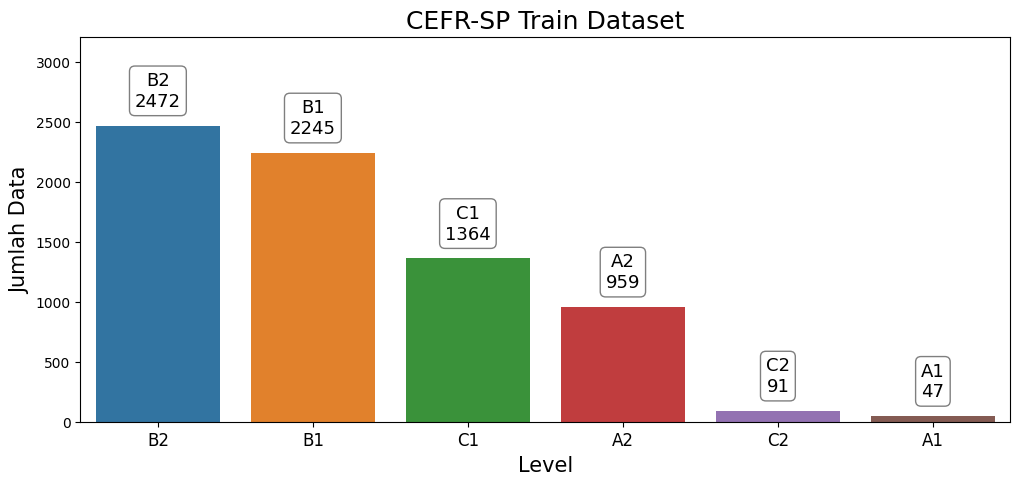

In [ ]:
# Visualize CEFR-SP train dataset
vis_data(df_cefr_sp_train, "CEFR-SP Train Dataset")

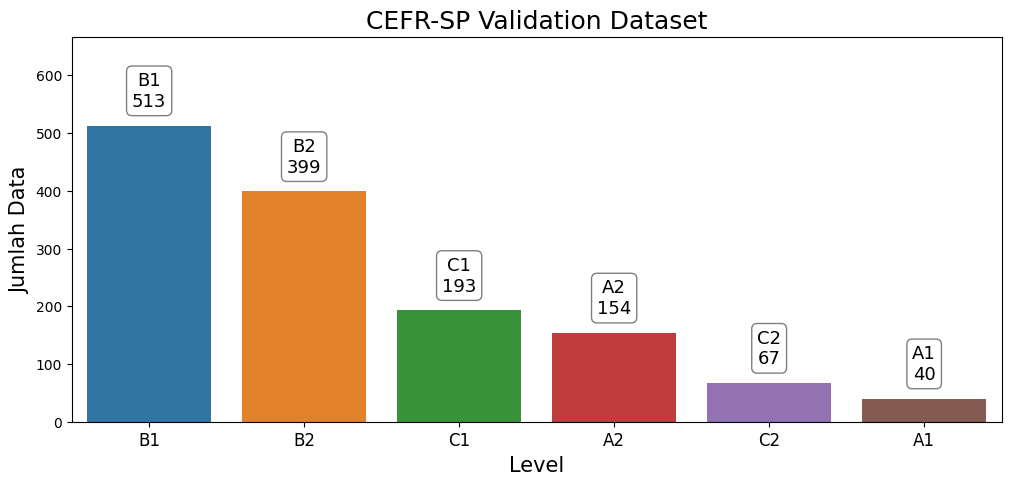

In [ ]:
# Visualize CEFR-SP validation dataset
vis_data(df_cefr_sp_val, "CEFR-SP Validation Dataset")

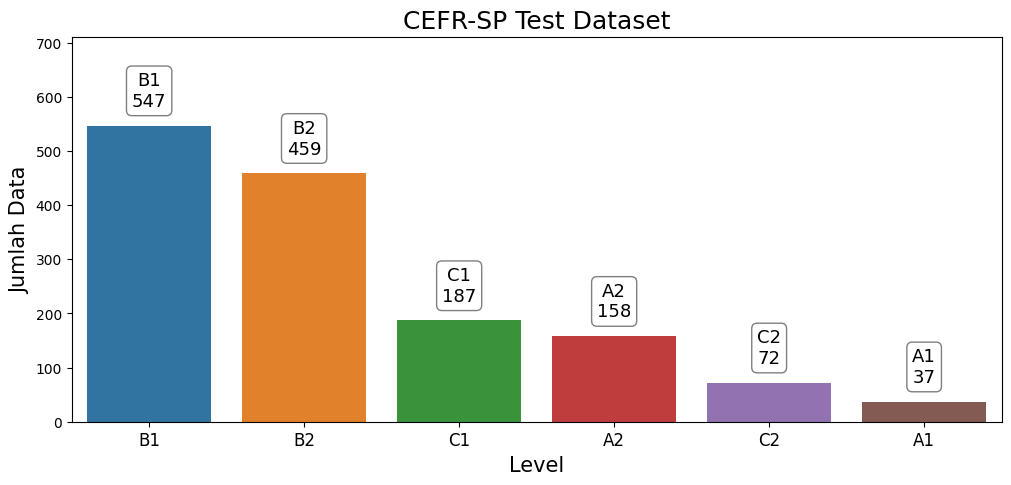

In [ ]:
# Visualize CEFR-SP test dataset
vis_data(df_cefr_sp_test, "CEFR-SP Test Dataset")

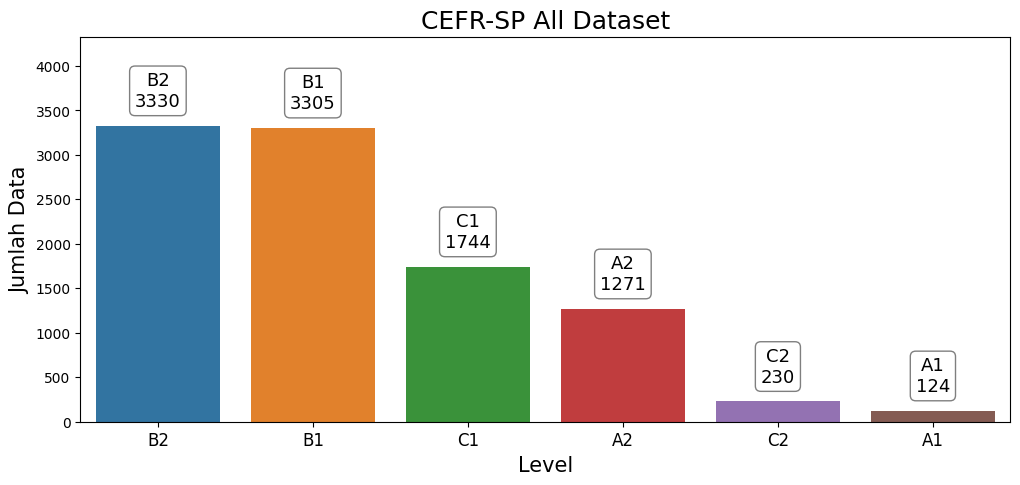

In [ ]:
# Visualize CEFR-SP all dataset
vis_data(df_cefr_sp_all, "CEFR-SP All Dataset")

### Kaggle

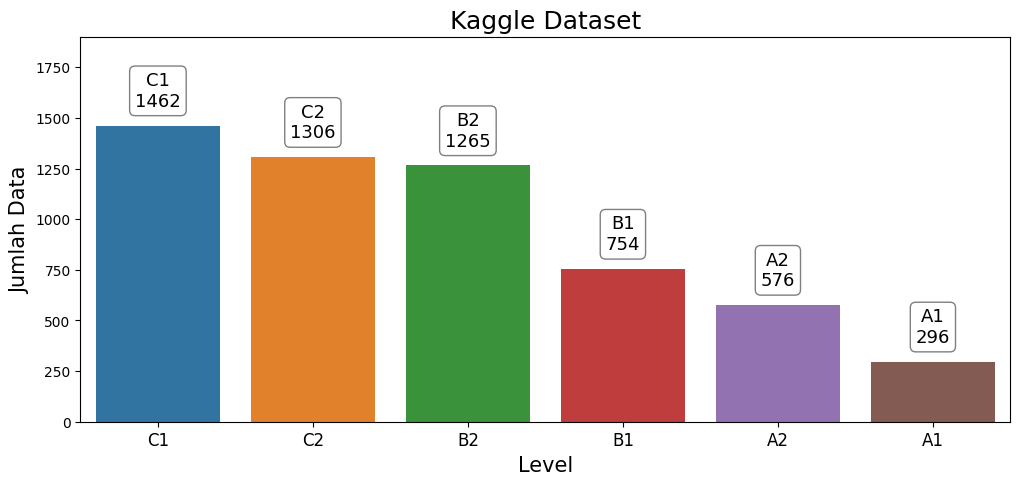

In [ ]:
# Visualize Kaggle dataset
vis_data(df_kaggle, "Kaggle Dataset")

### CERD

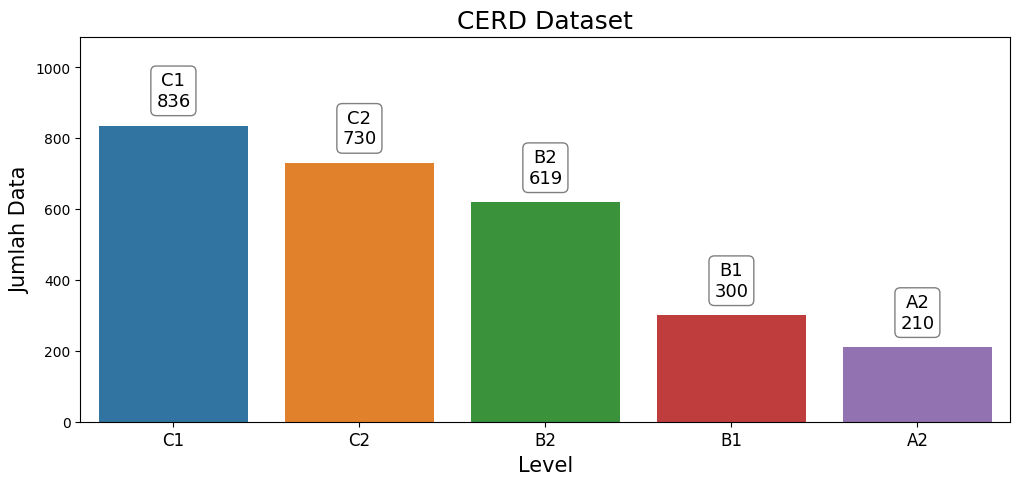

In [ ]:
# Visualize CERD dataset
vis_data(df_cerd, "CERD Dataset")

### Hugging Face

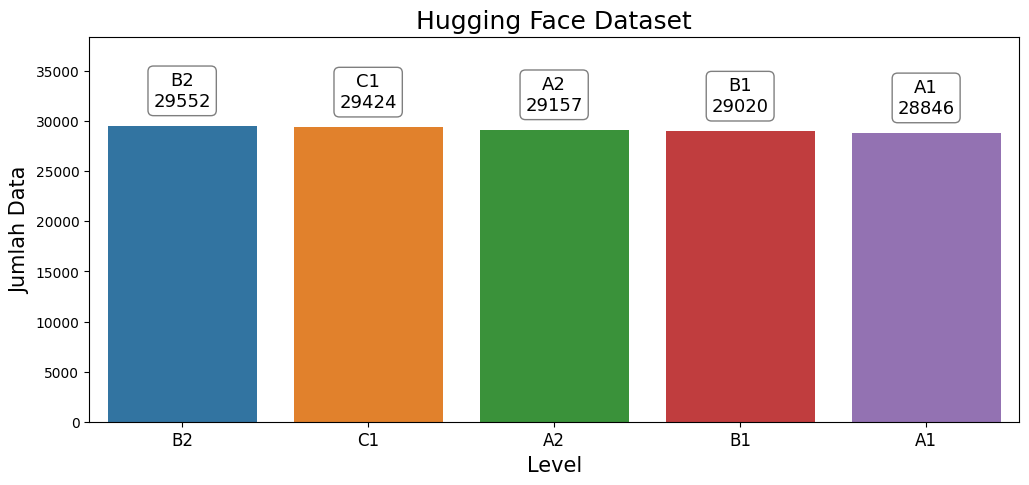

In [ ]:
# Visualize Hugging Face dataset
vis_data(df_hugging_face, "Hugging Face Dataset")

### All

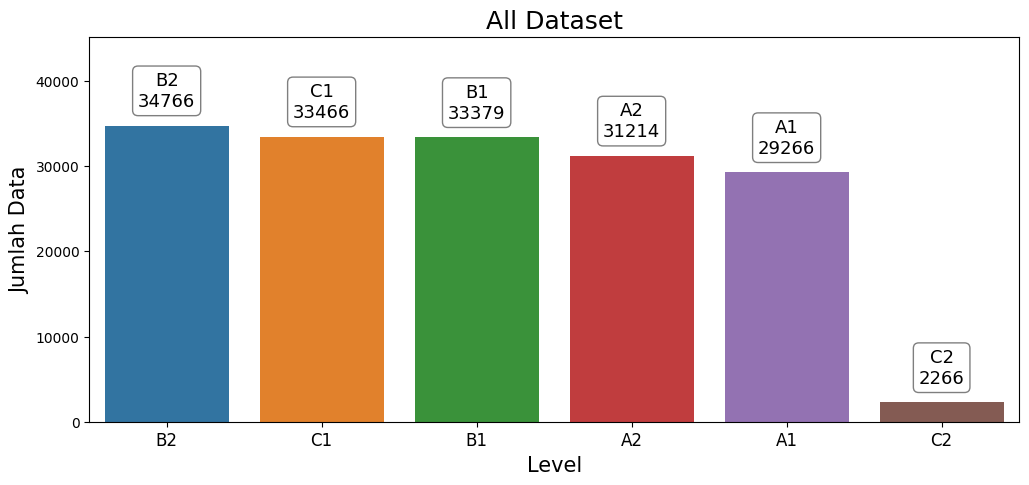

In [ ]:
# Visualize all dataset
vis_data(df_all, "All Dataset")

# Dataset information

# Select dataset

## CEFR-SP

In [ ]:
# Select data for training from CEFR-SP
df_training = df_cefr_sp_all

## Kaggle

In [ ]:
# Select data for training from Kaggle
df_training = df_kaggle

## CERD

In [ ]:
# Select data for training from CERD
df_training = df_cerd

## Hugging Face

In [ ]:
# Select data for training from Hugging Face
df_training = df_hugging_face

## All

In [ ]:
# Select data for training from all dataset
df_training = df_all

## Cut

In [ ]:
# Select dataset
df_cut = df_all

In [ ]:
# Define sample
sample_data = 2266

In [ ]:
# Select data every class
df_a1 = df_cut[df_cut["Level"] == "A1"].sample(n = sample_data)
df_a2 = df_cut[df_cut["Level"] == "A2"].sample(n = sample_data)
df_b1 = df_cut[df_cut["Level"] == "B1"].sample(n = sample_data)
df_b2 = df_cut[df_cut["Level"] == "B2"].sample(n = sample_data)
df_c1 = df_cut[df_cut["Level"] == "C1"].sample(n = sample_data)
df_c2 = df_cut[df_cut["Level"] == "C2"].sample(n = sample_data)

In [ ]:
# Merging selected dataset
df_cut_final = pd.concat([df_a1, df_a2, df_b1, df_b2, df_c1, df_c2])
df_cut_final.head()

,Text,Level,A1,A2,B1,B2,C1,C2,Labels
125307,"When the reporters started arriving at the house, Kitty ignored them and seemed greatly concerned about getting to Steel City to see Ella Lowell.",A1,1,0,0,0,0,0,"[0, 1, 0, 0, 0, 0]"
7181,I sent my girlfriend red roses .,A1,1,0,0,0,0,0,"[1, 0, 0, 0, 0, 0]"
108939,"When the desk became too littered he would spread a newspaper over the letters and papers, and start again.",A1,1,0,0,0,0,0,"[0, 1, 0, 0, 0, 0]"
69921,"Fully a thousand persons were turned away, many of whom now milled on the lawn under the tall windows, flung open to the summer night, waiting for Idaho's mightiest rhetorician to conjure the grand themes of the prosecution case.",A1,1,0,0,0,0,0,"[0, 1, 0, 0, 0, 0]"
103623,"Some officials, to impose order, resorted to curfews not unlike medieval restrictions.",A1,1,0,0,0,0,0,"[0, 1, 0, 0, 0, 0]"


In [ ]:
# Select data for training from cut all dataset
df_training = df_cut_final

# Split dataset

In [ ]:
# Identify X dan y
X_training = df_training["Text"]
y_training = df_training[["A1", "A2", "B1", "B2", "C1", "C2"]]

In [ ]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_training, y_training, test_size=0.2, random_state=4)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=4)

In [ ]:
# Data check
print("Jumlah training data     ", len(X_train.index), " baris.")
print("Jumlah developmen data   ", len(X_test.index), " baris.")
print("Jumlah test data         ", len(X_valid.index), " baris.")

Jumlah training data      8700  baris.
Jumlah developmen data    2720  baris.
Jumlah test data          2176  baris.


In [ ]:
# Value count All dataset
df_training["Level"].value_counts()

A1    2266
A2    2266
B1    2266
B2    2266
C1    2266
C2    2266
Name: Level, dtype: int64

# Save dataset

In [ ]:
!cp -r /content/drive/MyDrive/"Capstone Project"/Lexical/Model/"Version 2"/All/ielts_lexical_all_cut.tar /content/
!cp -r /content/drive/MyDrive/"Capstone Project"/Lexical/Model/"Version 2"/All/tokenizer_ielts_lexical_all_cut.pickle /content/

In [ ]:
!tar -xvf /content/ielts_lexical_all_cut.tar -C /content/ielts_lexical_all_cut

ielts_lexical_all_cut/
ielts_lexical_all_cut/assets/
ielts_lexical_all_cut/saved_model.pb
ielts_lexical_all_cut/keras_metadata.pb
ielts_lexical_all_cut/variables/
ielts_lexical_all_cut/variables/variables.data-00000-of-00001
ielts_lexical_all_cut/variables/variables.index
ielts_lexical_all_cut/fingerprint.pb


In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K

In [ ]:
# Fungsi loss
def focal_loss(gamma=2.0, alpha=0.2):
    
    def focal_loss_fixed(y_true, y_pred):
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -K.mean(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1)) - K.mean((1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0))
    
    return focal_loss_fixed

In [ ]:
# Load model 
from keras.models import load_model

loaded_model_h5 = tf.keras.models.load_model("ielts_lexical_all_cut/ielts_lexical_all_cut", custom_objects={"focal_loss_fixed": focal_loss()})

In [ ]:
loaded_model_h5.summary()

Model: "IELTS_lexical_nn_model_all_data_cut"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 512)]        0           []                               
                                                                                                  
 input_attention (InputLayer)   [(None, 512)]        0           []                               
                                                                                                  
 distilbert (Custom>TFDistilBer  {'hidden_states': (  66362880   ['input_ids[0][0]',              
 tMainLayer)                    (None, 512, 768),                 'input_attention[0][0]']        
                                 (None, 512, 768),                                                
                                 (None, 512, 768),              

# Train

In [ ]:
# Install library
%%capture
!pip install transformers

In [ ]:
import time
import tensorflow as tf
from tensorflow.keras import backend as K
from transformers import DistilBertTokenizerFast, DistilBertConfig, TFDistilBertModel

In [ ]:
# Definisi variabel
x_train = X_train
x_valid = X_valid
x_test = X_test
y_train = y_train
y_valid = y_valid
y_test = y_test

In [ ]:
# Definisi variabel params
params = {"MAX_LENGTH": 512,
          "EPOCHS": 50,
          "LEARNING_RATE": 1e-4,
          "FT_EPOCHS": 70,
          'FT_LEARNING_RATE': 1e-5,
          "OPTIMIZER": "adam",
          "FL_GAMMA": 2.0,
          "FL_ALPHA": 0.2,
          "BATCH_SIZE": 16,
          "VERBOSE": 2,
          "NUM_STEPS": len(x_train.index) // 64,
          "DISTILBERT_DROPOUT": 0.5,
          "DISTILBERT_ATT_DROPOUT": 0.2,
          "LAYER_DROPOUT": 0.2,
          "DENSE_ACTIVATION": "tanh",
          "LSTM_ACTIVATION": "tanh",
          "OUTPUT_ACTIVATION": "softmax",
          "DENSE_BIAS": "zeros",
          "KERNEL_INITIALIZER": "GlorotNormal",
          "BIAS_INITIALIZER": "zeros",
          "POS_PROBA_THRESHOLD": 0.5,          
          "ADDED_LAYERS": "Dense 256, Dense 128, Dense 32, Dropout 0.2",
          "LR_SCHEDULE": "1e-5 for 10 epochs, Fine-tune w/ adam for 5 epochs @1e-6",
          "FREEZING": "All DistilBERT layers frozen for 10 epochs, then unfrozen for 5",
          "RANDOM_STATE": 42,
          }

In [ ]:
# Definisi fungsi encoding
def batch_encode(tokenizer, texts, batch_size=params["BATCH_SIZE"], max_length=params["MAX_LENGTH"]):
    input_ids = []
    attention_mask = []
    
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        inputs = tokenizer.batch_encode_plus(batch,
                                             max_length=max_length,
                                             padding="max_length",
                                             truncation=True,
                                             return_attention_mask=True,
                                             return_token_type_ids=False
                                             )
        input_ids.extend(inputs["input_ids"])
        attention_mask.extend(inputs["attention_mask"])
        
    return tf.convert_to_tensor(input_ids), tf.convert_to_tensor(attention_mask)

In [ ]:
# Inisialisasi token distilBERT
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

# Encode X_train
X_train_ids, X_train_attention = batch_encode(tokenizer, x_train.tolist())

# Encode X_valid
X_valid_ids, X_valid_attention = batch_encode(tokenizer, x_valid.tolist())

# Encode X_test
X_test_ids, X_test_attention = batch_encode(tokenizer, x_test.tolist())

In [ ]:
# Fungsi focal loss
def focal_loss(gamma=params["FL_GAMMA"], alpha=params["FL_ALPHA"]):
    
    def focal_loss_fixed(y_true, y_pred):
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        return -K.mean(alpha * K.pow(1. - pt_1, gamma) * K.log(pt_1)) - K.mean((1 - alpha) * K.pow(pt_0, gamma) * K.log(1. - pt_0))
    
    return focal_loss_fixed

In [ ]:
# Fungsi custom model NN
def build_model_nn(transformer, max_length=params["MAX_LENGTH"]):
    
    # Definisi bobot
    weight_initializer = tf.keras.initializers.GlorotNormal(seed=params["RANDOM_STATE"]) 
    
    # Definisi layers input
    input_ids_layer = tf.keras.layers.Input(shape=(max_length,), 
                                            name="input_ids", 
                                            dtype="int32",
                                           )
    input_attention_layer = tf.keras.layers.Input(shape=(max_length,), 
                                                  name="input_attention", 
                                                  dtype="int32",
                                                 )
    # Output model DistilBERT berbentuk tuple dengan elemen di index ke 0 adalah
    # representasi hidden-state output dari model layer terakhir
    # dengan sebuah tf.Tensor dengan ukuran (batch_size, sequence_length, hidden_size=768).
    last_hidden_state = transformer.distilbert([input_ids_layer, input_attention_layer])[0]
    
    # Kami akan menggunakan output DistilBERT untuk token [CLS] yang berlokasi di index 0.
    # Sehingga kami akan melakukan Splicing token [CLS] yang memberikan sebuah data 2D.
    cls_token = last_hidden_state[:, 0, :]
    
    D1 = tf.keras.layers.Dropout(params["LAYER_DROPOUT"],
                                 seed=params["RANDOM_STATE"],
                                 name="Dropout_1",
                                )(cls_token)

    Dense1 = tf.keras.layers.Dense(256,
                                   activation=params["DENSE_ACTIVATION"],
                                   kernel_initializer=weight_initializer,
                                   bias_initializer=params["DENSE_BIAS"],
                                   name="Dense_1",
                                  )(D1)
    
    D2 = tf.keras.layers.Dropout(params["LAYER_DROPOUT"],
                                 seed=params["RANDOM_STATE"],
                                 name="Dropout_2",
                                )(Dense1)
    
    Dense2 = tf.keras.layers.Dense(128,
                                   activation=params["DENSE_ACTIVATION"],
                                   kernel_initializer=weight_initializer,
                                   bias_initializer=params["DENSE_BIAS"],
                                   name="Dense_2",
                                  )(D2)
    
    D3 = tf.keras.layers.Dropout(params["LAYER_DROPOUT"],
                                 seed=params["RANDOM_STATE"],
                                 name="Dropout_3",
                                )(Dense2)

    Dense3 = tf.keras.layers.Dense(32,
                                   activation=params["DENSE_ACTIVATION"],
                                   kernel_initializer=weight_initializer,
                                   bias_initializer=params["DENSE_BIAS"],
                                   name="Dense_3",
                                  )(D3)

    D4 = tf.keras.layers.Dropout(params["LAYER_DROPOUT"],
                                 seed=params["RANDOM_STATE"],
                                 name="Dropout_4",
                                )(Dense3)
                                
    output = tf.keras.layers.Dense(6, 
                                   activation=params["OUTPUT_ACTIVATION"],
                                   kernel_initializer=weight_initializer,
                                   bias_initializer=params["DENSE_BIAS"],
                                   name="Output",
                                  )(D4)
    
    # Definisi model
    model = tf.keras.Model([input_ids_layer, input_attention_layer], output, name="IELTS_lexical_nn_model_all_data_cut")
    
    # Compile model
    model.compile(tf.keras.optimizers.Adam(learning_rate=params["LEARNING_RATE"]), 
                  loss=focal_loss(),
                  metrics=["accuracy"],
                 )
    
    return model

In [ ]:
# Konfigurasi model DistilBERT
config = DistilBertConfig(dropout=params["DISTILBERT_DROPOUT"], 
                          attention_dropout=params["DISTILBERT_ATT_DROPOUT"], 
                          output_hidden_states=True,
                         )

# Inisialisasi model DistilBERT
distilBERT = TFDistilBertModel.from_pretrained("distilbert-base-uncased", config=config)

# Membekukan layer di model DistilBERT untuk mempertahankan bobot yang telah dilatih sebelumnya
for layer in distilBERT.layers:
    layer.trainable = False

# Build model
model = build_model_nn(distilBERT)

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_transform', 'vocab_projector', 'activation_13', 'vocab_layer_norm']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [ ]:
# Menampilkan model
model.summary()

Model: "IELTS_lexical_nn_model_all_data_cut"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 512)]        0           []                               
                                                                                                  
 input_attention (InputLayer)   [(None, 512)]        0           []                               
                                                                                                  
 distilbert (TFDistilBertMainLa  TFBaseModelOutput(l  66362880   ['input_ids[0][0]',              
 yer)                           ast_hidden_state=(N               'input_attention[0][0]']        
                                one, 512, 768),                                                   
                                 hidden_states=((No             

In [ ]:
# Training model
time_training_init = time.time()
train_history = model.fit(
    x = [X_train_ids, X_train_attention],
    y = y_train.to_numpy(),
    epochs = params["EPOCHS"],
    batch_size = params["BATCH_SIZE"],
    steps_per_epoch = params["NUM_STEPS"],
    validation_data = ([X_valid_ids, X_valid_attention], y_valid.to_numpy()),
    verbose=params["VERBOSE"],
)
time_training = time.time()-time_training_init
print("Training time:", time_training)

Epoch 1/50


KeyboardInterrupt: ignored

In [ ]:
# Membuka bobot layer model DistilBERT untuk dilakukan fine-tuning
for layer in distilBERT.layers:
    layer.trainable = True

# Definisi optimizer untuk fine-tuning
optimizer = tf.keras.optimizers.Adam(learning_rate=params["FT_LEARNING_RATE"])

# Compile model
model.compile(optimizer=optimizer, 
              loss=focal_loss(),
              metrics=["accuracy"],
             )

In [ ]:
# Fine-tuning model
time_fine_tunning_init = time.time()
finetuning_history = model.fit(
    x = [X_train_ids, X_train_attention],
    y = y_train.to_numpy(),
    epochs = params["FT_EPOCHS"],
    batch_size = params["BATCH_SIZE"],
    steps_per_epoch = params["NUM_STEPS"],
    validation_data = ([X_valid_ids, X_valid_attention], y_valid.to_numpy()),
    verbose=params["VERBOSE"],
)
time_fine_tunning = time.time()-time_fine_tunning_init
print("Fine-Tunning time:", time_fine_tunning)

Epoch 1/70
135/135 - 177s - loss: 0.0347 - accuracy: 0.4449 - val_loss: 0.0358 - val_accuracy: 0.4568 - 177s/epoch - 1s/step
Epoch 2/70
135/135 - 155s - loss: 0.0346 - accuracy: 0.4514 - val_loss: 0.0353 - val_accuracy: 0.4550 - 155s/epoch - 1s/step
Epoch 3/70
135/135 - 155s - loss: 0.0329 - accuracy: 0.4912 - val_loss: 0.0338 - val_accuracy: 0.4784 - 155s/epoch - 1s/step
Epoch 4/70
135/135 - 155s - loss: 0.0333 - accuracy: 0.4685 - val_loss: 0.0336 - val_accuracy: 0.4807 - 155s/epoch - 1s/step
Epoch 5/70
135/135 - 155s - loss: 0.0316 - accuracy: 0.5023 - val_loss: 0.0329 - val_accuracy: 0.4991 - 155s/epoch - 1s/step
Epoch 6/70
135/135 - 155s - loss: 0.0319 - accuracy: 0.5153 - val_loss: 0.0323 - val_accuracy: 0.5046 - 155s/epoch - 1s/step
Epoch 7/70
135/135 - 155s - loss: 0.0311 - accuracy: 0.5171 - val_loss: 0.0313 - val_accuracy: 0.5165 - 155s/epoch - 1s/step
Epoch 8/70
135/135 - 156s - loss: 0.0314 - accuracy: 0.5153 - val_loss: 0.0325 - val_accuracy: 0.5074 - 156s/epoch - 1s/step


In [ ]:
time_fine_tunning_init2 = time.time()
finetuning_history2 = loaded_model_h5.fit(
    x = [X_train_ids, X_train_attention],
    y = y_train.to_numpy(),
    epochs = 10,
    batch_size = params["BATCH_SIZE"],
    steps_per_epoch = params["NUM_STEPS"],
    validation_data = ([X_valid_ids, X_valid_attention], y_valid.to_numpy()),
    verbose=params["VERBOSE"],
)
time_fine_tunning2 = time.time()-time_fine_tunning_init2
print("Fine-Tunning time:", time_fine_tunning2)

Epoch 1/10


KeyboardInterrupt: ignored

In [ ]:
# Evaluasi
eval_loss, eval_accuracy = model.evaluate([X_test_ids, X_test_attention],
                                          y_test.to_numpy(),
                                          batch_size=params["BATCH_SIZE"],
                                          verbose=params["VERBOSE"],
                                         )
print("Loss:", eval_loss)
print("Accuracy:", eval_accuracy)

170/170 - 50s - loss: 0.0346 - accuracy: 0.5912 - 50s/epoch - 297ms/step
Loss: 0.03459247946739197
Accuracy: 0.591176450252533


In [ ]:
# Cek nilai prediksi
print("Nilai token X ids:")
print(X_test_ids[20:21])
print("Nilai token X attention:")
print(X_test_attention[20:21])
print("Nilai y:")
print(y_test.to_numpy()[20:21])

Nilai token X ids:
tf.Tensor(
[[  101  1996  2391  2002  2003  2437  2182  7336  1037  2825  3276  2090
   1996 20965 18924  1997  1037  8060  2492  1010  1996 28086  8713  1037
   4226  3560  6121 22731  1997 16889  1010 22889 15558  1998  4586  1010
   1998  1996 24628  3252  1997 11970  1998 13246  1012   102     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0 

In [ ]:
# Melakukan prediksi
pred = model.predict([X_test_ids[20:21], X_test_attention[20:21]])
print("Probabilitas prediksi:", pred)
tar = np.argmax(y_test.to_numpy()[20:21], axis = 1)
print("Hasil target di kelas: ", tar)
classes = np.argmax(pred, axis = 1)
print("Hasil prediksi di kelas: ", classes)

1/1 [==============================] - 1s 1s/step
Probabilitas prediksi: [[0.07234434 0.2320169  0.05171192 0.22168556 0.37170148 0.05053978]]
Hasil target di kelas:  [4]
Hasil prediksi di kelas:  [4]


In [ ]:
# Install library
%%capture
!pip install scikit-plot

In [ ]:
import scikitplot as skplt

In [ ]:
# Membuat dataset history
history_train = pd.DataFrame(train_history.history)
history_finetuning = pd.DataFrame(finetuning_history.history)
# history_finetuning2 = pd.DataFrame(finetuning_history2.history)
history = pd.concat([history_train, history_finetuning], ignore_index=True)

In [ ]:
# Mendapatkan informasi data loss
epoch_train_loss = int(history[history["loss"] == history["loss"].min()].index.values[0])
epoch_val_loss = int(history[history["val_loss"] == history["val_loss"].min()].index.values[0])
train_loss_min = float("{:0.4f}".format(history["loss"].min()))
val_loss_min = float("{:0.4f}".format(history["val_loss"].min()))

Minimal Train Loss: 0.0343
Minimal Validation Loss: 0.0352


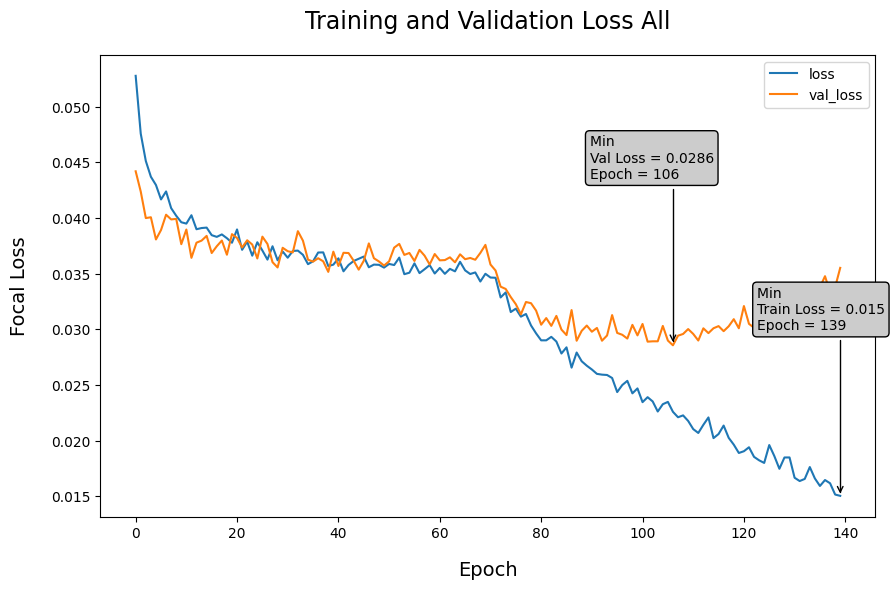

In [ ]:
# Ploting loss training dan validation setiap epoch
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(history.loc[:, ["loss", "val_loss"]])
ax.legend(labels=["loss", "val_loss"])
ax.annotate(
    f"Min \nTrain Loss = {train_loss_min}\nEpoch = {epoch_train_loss}",
    xy=(epoch_train_loss, train_loss_min), xycoords="data",
    xytext=(-60, 120), textcoords="offset points",
    bbox=dict(boxstyle="round", fc="0.8"),
    arrowprops=dict(arrowstyle="->",
                    connectionstyle="angle,angleA=0,angleB=90,rad=10"))
ax.annotate(
    f"Min \nVal Loss = {val_loss_min}\nEpoch = {epoch_val_loss}",
    xy=(epoch_val_loss, val_loss_min), xycoords="data",
    xytext=(-60, 120), textcoords="offset points",
    bbox=dict(boxstyle="round", fc="0.8"),
    arrowprops=dict(arrowstyle="->",
                    connectionstyle="angle,angleA=0,angleB=90,rad=10"))
plt.title(label="Training and Validation Loss All", fontsize=17, pad=19)
plt.xlabel("Epoch", labelpad=14, fontsize=14)
plt.ylabel("Focal Loss", labelpad=16, fontsize=14)
print("Minimal Train Loss: {:0.4f}".format(history_train["loss"].min()))
print("Minimal Validation Loss: {:0.4f}".format(history_train["val_loss"].min()))

# Menyimpan gambar
plt.savefig("loss_all_cut.png", dpi=300.0, transparent=True)

In [ ]:
# Mendapatkan informasi data akurasi
epoch_train_accuracy = int(history[history["accuracy"] == history["accuracy"].max()].index.values[0])
epoch_val_accuracy = int(history[history["val_accuracy"] == history["val_accuracy"].max()].index.values[0])
train_accuracy_max = float("{:0.4f}".format(history["accuracy"].max()))
val_accuracy_max = float("{:0.4f}".format(history["val_accuracy"].max()))

Maksimal Train Accuracy: 0.4527
Maksimal Validation Accuracy: 0.4485


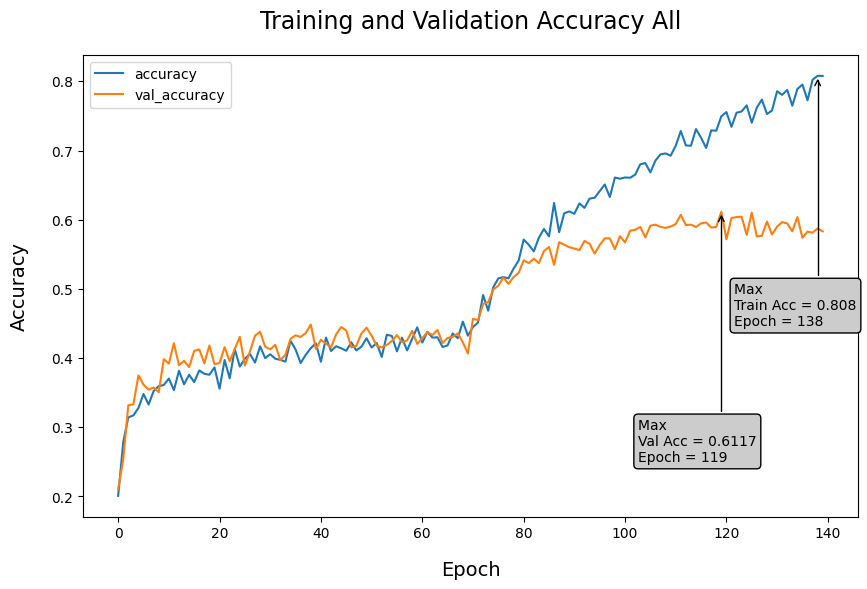

In [ ]:
# Ploting accuracy training dan validation setiap epoch
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(history.loc[:, ["accuracy", "val_accuracy"]])
ax.legend(labels=["accuracy", "val_accuracy"])
ax.annotate(
    f"Max \nTrain Acc = {train_accuracy_max}\nEpoch = {epoch_train_accuracy}",
    xy=(epoch_train_accuracy, train_accuracy_max), xycoords="data",
    xytext=(-60, -180), textcoords="offset points",
    bbox=dict(boxstyle="round", fc="0.8"),
    arrowprops=dict(arrowstyle="->",
                    connectionstyle="angle,angleA=0,angleB=90,rad=10"))
ax.annotate(
    f"Max \nVal Acc = {val_accuracy_max}\nEpoch = {epoch_val_accuracy}",
    xy=(epoch_val_accuracy, val_accuracy_max), xycoords="data",
    xytext=(-60, -180), textcoords="offset points",
    bbox=dict(boxstyle="round", fc="0.8"),
    arrowprops=dict(arrowstyle="->",
                    connectionstyle="angle,angleA=0,angleB=90,rad=10"))
plt.title(label="Training and Validation Accuracy All", fontsize=17, pad=19)
plt.xlabel("Epoch", labelpad=14, fontsize=14)
plt.ylabel("Accuracy", labelpad=16, fontsize=14)
print("Maksimal Train Accuracy: {:0.4f}".format(history_train["accuracy"].max()))
print("Maksimal Validation Accuracy: {:0.4f}".format(history_train["val_accuracy"].max()))

# Menyimpan gambar
plt.savefig("acc_all_cut.png", dpi=300.0, transparent=True)

85/85 [==============================] - 52s 611ms/step


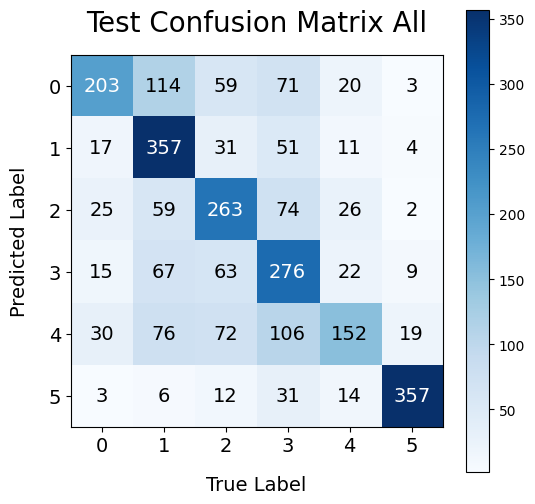

In [ ]:
# Prediksi dataset test
y_pred = model.predict([X_test_ids, X_test_attention])
y_pred_thresh = np.argmax(y_test.to_numpy(), axis = 1)
classes = np.argmax(y_pred, axis = 1)

# Plot confusion matrix
skplt.metrics.plot_confusion_matrix(y_pred_thresh,
                                    classes,
                                    figsize=(6, 6),
                                    text_fontsize=14,
                                   )
plt.title(label="Test Confusion Matrix All", fontsize=20, pad=17)
plt.ylabel("Predicted Label", labelpad=14)
plt.xlabel("True Label", labelpad=14)

# Menyimpan gambar
plt.savefig("confusion_matrix_all_cut.png", dpi=300.0, transparent=True)

In [ ]:
from sklearn import metrics

# Prediksi dataset test
y_pred = model.predict([X_test_ids, X_test_attention])
y_pred_thresh = np.argmax(y_test.to_numpy(), axis = 1)
classes = np.argmax(y_pred, axis = 1)

print(metrics.classification_report(y_pred_thresh, classes, digits=3))

85/85 [==============================] - 52s 608ms/step
              precision    recall  f1-score   support

           0      0.693     0.432     0.532       470
           1      0.526     0.758     0.621       471
           2      0.526     0.586     0.554       449
           3      0.453     0.611     0.520       452
           4      0.620     0.334     0.434       455
           5      0.906     0.844     0.874       423

    accuracy                          0.591      2720
   macro avg      0.621     0.594     0.589      2720
weighted avg      0.618     0.591     0.586      2720



In [ ]:
import pickle

In [ ]:
# Save the tuned DistilBERT so you can use it later
model_directory = "ielts_lexical_all_cut"
tokenizer_directory = "tokenizer_ielts_lexical_all_cut.pickle"
model.save(model_directory)
with open(tokenizer_directory, "wb") as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# Save model h5
model.save("ielts_lexical_all_cut.h5")

In [ ]:
# Zip file
!tar -cvf "ielts_lexical_all_cut.tar" "ielts_lexical_all_cut/"

ielts_lexical_all_cut/
ielts_lexical_all_cut/assets/
ielts_lexical_all_cut/saved_model.pb
ielts_lexical_all_cut/keras_metadata.pb
ielts_lexical_all_cut/variables/
ielts_lexical_all_cut/variables/variables.data-00000-of-00001
ielts_lexical_all_cut/variables/variables.index
ielts_lexical_all_cut/fingerprint.pb


In [ ]:
# Save model to drive
!cp -r /content/ielts_lexical_all_cut.h5 /content/drive/MyDrive/"Capstone Project"/Lexical/Model/"Version 2"/All
!cp -r /content/ielts_lexical_all_cut.tar /content/drive/MyDrive/"Capstone Project"/Lexical/Model/"Version 2"/All
!cp -r /content/tokenizer_ielts_lexical_all_cut.pickle /content/drive/MyDrive/"Capstone Project"/Lexical/Model/"Version 2"/All
!cp -r /content/confusion_matrix_all_cut.png /content/drive/MyDrive/"Capstone Project"/Lexical/Model/"Version 2"/All
!cp -r /content/acc_all_cut.png /content/drive/MyDrive/"Capstone Project"/Lexical/Model/"Version 2"/All
!cp -r /content/loss_all_cut.png /content/drive/MyDrive/"Capstone Project"/Lexical/Model/"Version 2"/All